# **Abstract**

This study utilizes an extensive dataset detailing the cost of living across various regions in the United States. The dataset encompasses a wide array of variables, including but not limited to state, whether the area is metropolitan, the area's name and county, family member count, and the costs associated with housing, food, transportation, healthcare, other necessities, childcare, and taxes. Additionally, it includes the total cost of living and median family income for each entry. With over 31,430 rows, this dataset provides a comprehensive view of the financial requirements needed to maintain different standards of living across the country. The study aims to leverage AutoML tools to identify significant predictors of the cost of living, examining relationships between various costs and median family income. Through multivariate modeling, this research seeks to uncover the most impactful variables on the cost of living, addressing questions of multicollinearity, model assumptions, and the significance of relationships between predictors. This exploration is crucial for understanding the dynamics of financial well-being and could inform policy-making, financial planning, and social services deployment.

# **Data Set**

The data set consists of various characteristics related to the cost of living in different regions across the United States, including both metropolitan and non-metropolitan areas. The dataset includes:

14 independent variables: These variables represent different costs and factors that contribute to the overall cost of living.
Total Cost of Living: This can be considered the dependent variable, representing the cumulative cost required for a standard of living in the specified area.
There are a total of 31,430 observations.


# **The meaning of every feature:**

CaseID: Unique identifier for each entry in the dataset.

State: The US state where the data was collected.

Metro: Indicates if the area is metropolitan (1) or not (0).

Area Name: The name of the area or city.

County: The county in which the area is located.

Num_Family_Members: Number of family members considered for calculating the cost of living.

Housing: Cost associated with housing in the area, possibly including rent or mortgage payments.

Food: Cost of food and groceries.

Transportation: Expenses related to transportation, including public transit and personal vehicle costs.

Healthcare: Costs associated with healthcare services.

Other Necessities: Costs of other essential services and goods not categorized elsewhere.

Childcare: Expenses related to childcare services.

Taxes: Estimated taxes paid by a household in the area.

Total_Cost_of_Living: Sum of all the costs, representing the total cost of living for a family of the specified size in the area.

Median_Family_Income: Median family income in the area, serving as a benchmark for comparing the cost of living.

Inititalising H2O

In [1]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install xgboost
# for outlier preprocessing
!pip install datasist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.4 MB/s eta 0:00:00


In [2]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.2/265.2 MB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.3-py2.py3-none-any.whl size=265293968 sha256=8e6bb4fdaa9069f7f6b840c143cfe1b5b7bfc880b4a5e5064d761092ef835536
  Stored in directory: /root/.cache/pip/wheels/77/9a/1c/2da26f943fd46b57f3c20b54847b936b9152b831dc7447cf71
Successfully built h2o


In [3]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [4]:
# Initialize H2O
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpgw82zkdg
  JVM stdout: /tmp/tmpgw82zkdg/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpgw82zkdg/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 30 days
H2O_cluster_name:,H2O_from_python_unknownUser_gmydy2
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [5]:
# Import dataset
url = "https://raw.githubusercontent.com/Kotha-Nikhil/INFO-6105-Data-Science/main/cost_of_living_us.csv"
data = pd.read_csv(url)

# Load dataset
#df = pd.read_csv("/path/to/your/cost_of_living_us.csv")  # Adjust the path to where your dataset is stored


# Convert to H2O Frame
hf = h2o.H2OFrame(data)

# Optionally, display the frame to check it's loaded correctly
hf.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
1,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.73,3454.92,10829.2,5737.48,4333.81,0,6392.95,39254.1,73010.4
1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.5,5091.71,11588.2,8659.56,6217.46,6147.83,7422.08,57194.3,73010.4
1,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.5,7460.2,12361.8,11581.6,7075.66,15824.7,9769.56,76141,73010.4
1,AL,True,"Montgomery, AL MSA",Autauga County,1p3c,15257.2,9952.24,13452.2,14503.7,9134.36,18802.2,13101.7,94203.5,73010.4
1,AL,True,"Montgomery, AL MSA",Autauga County,1p4c,15257.2,12182.2,13744.6,17425.8,9942.36,18802.2,13469.2,100824,73010.4
1,AL,True,"Montgomery, AL MSA",Autauga County,2p0c,10180.3,6334.01,12861.9,11475,5983.79,0,8236.73,55071.7,73010.4
1,AL,True,"Montgomery, AL MSA",Autauga County,2p1c,12067.5,7883.32,13589.1,14397,7228.97,6147.83,9459.9,70773.7,73010.4
1,AL,True,"Montgomery, AL MSA",Autauga County,2p2c,12067.5,9984.05,14723.6,17319.1,7990.15,15824.7,11168.8,89077.9,73010.4
1,AL,True,"Montgomery, AL MSA",Autauga County,2p3c,15257.2,12189.8,14994.6,20241.2,9945.1,18802.2,13210.1,104640,73010.4
1,AL,True,"Montgomery, AL MSA",Autauga County,2p4c,15257.2,14917.4,15064.3,23163.3,10933.4,18802.2,13417.2,111555,73010.4


In [6]:
# print the the dataset
data.head()

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
0,1,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062
1,1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062
2,1,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062
3,1,AL,True,"Montgomery, AL MSA",Autauga County,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062
4,1,AL,True,"Montgomery, AL MSA",Autauga County,1p4c,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.414062


Studying the Data

In [7]:
data.describe()

,case_id,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
count,31430.000000,31430.000000,31430.000000,31430.000000,31430.000000,31430.000000,31430.000000,31430.000000,31430.000000,31420.000000
mean,1589.311804,11073.673539,8287.504557,13593.856381,13394.031748,7015.318377,9879.584233,7657.714782,70901.683601,68315.997017
std,917.218414,4165.606147,3271.140249,1640.456562,5204.545710,2397.415490,6778.223399,3339.795571,21846.545235,16886.970245
min,1.000000,4209.311280,2220.276840,2216.461440,3476.379960,2611.642080,0.000000,1027.800756,30087.662400,25529.976562
25%,792.000000,8580.000000,5801.424360,12535.159800,9667.440000,5286.354120,5341.621590,5597.970360,53776.019400,57223.988281
50%,1593.000000,10416.000000,8129.156280,13698.164400,13082.700000,6733.056120,10166.340120,6898.468860,70977.682800,65955.605469
75%,2386.000000,12444.000000,10703.624280,14765.758500,16657.816800,8413.090230,14276.377800,8790.207270,85371.341100,76136.070312
max,3171.000000,61735.587600,31178.619600,19816.482000,37252.274400,28829.443200,48831.085200,47753.390400,223717.548000,177662.468750



The descriptive statistics reveal a broad spectrum of living costs and incomes across families, indicating significant diversity in financial circumstances. The range in housing, food, transportation, and healthcare costs underscores the varied expenses families face, while the spread in median family income highlights economic disparities. The data reflects the complexity of managing family budgets amidst varying costs of living.

In [8]:
# finding null values if any
data.isnull().sum()

case_id                    0
state                      0
isMetro                    0
areaname                   0
county                     0
family_member_count        0
housing_cost               0
food_cost                  0
transportation_cost        0
healthcare_cost            0
other_necessities_cost     0
childcare_cost             0
taxes                      0
total_cost                 0
median_family_income      10
dtype: int64

case id is not relavant here so we drop it

In [9]:
data = data.drop('case_id', axis=1)

Tackling missing values

In [10]:
# Calculate the mean of the median_family_income column
median_family_income_mean = data['median_family_income'].mean()

# Replace missing values in median_family_income with the mean
data['median_family_income'].fillna(median_family_income_mean, inplace=True)

# Check if there are any missing values left
missing_values_after = data['median_family_income'].isnull().sum()
print("Missing values in 'median_family_income' after filling:", missing_values_after)

Missing values in 'median_family_income' after filling: 0


In [11]:
data.isnull().sum()

state                     0
isMetro                   0
areaname                  0
county                    0
family_member_count       0
housing_cost              0
food_cost                 0
transportation_cost       0
healthcare_cost           0
other_necessities_cost    0
childcare_cost            0
taxes                     0
total_cost                0
median_family_income      0
dtype: int64

Note: For the moment we will assume the data is good and data processing is not required

In [12]:
hf.types

{'case_id': 'int',
 'state': 'enum',
 'isMetro': 'enum',
 'areaname': 'enum',
 'county': 'enum',
 'family_member_count': 'enum',
 'housing_cost': 'real',
 'food_cost': 'real',
 'transportation_cost': 'real',
 'healthcare_cost': 'real',
 'other_necessities_cost': 'real',
 'childcare_cost': 'real',
 'taxes': 'real',
 'total_cost': 'real',
 'median_family_income': 'real'}

In [13]:
hf.shape

(31430, 15)

Splitting the dataset

In [14]:
train, valid, test = hf.split_frame(ratios=[.7, .15], seed=1234)
# Summary of the split
print("Training set:", train.shape)
print("Validation set:", valid.shape)
print("Test set:", test.shape)

Training set: (22104, 15)
Validation set: (4609, 15)
Test set: (4717, 15)


Running AutoML

In [15]:
from h2o.automl import H2OAutoML

# Define X (features) and y (target)
y = 'total_cost'
X = hf.columns
X.remove(y)

# Run AutoML
# Run AutoML for 10 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=10, seed=1234, sort_metric="MAE", max_runtime_secs=600)
aml.train(x=X, y=y, training_frame=train, validation_frame=valid, leaderboard_frame=test)

AutoML progress: |
03:31:24.756: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_1_20240220_33124


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    421                421                         577770                 10           15           14.7648       22            139           71.0903

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 416110.3797120363
RMSE: 645.0661824278469
MAE: 233.36583814369007
RMSLE: 0.005567241406988401
Mean Residual Deviance: 416110.3797120363

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 921068.380072932
RMSE: 959.7230746798433
MAE: 453.61243556327605
RMSLE: 0.009552291890527604
Mean Residual Deviance: 921068.380072932

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 1070858.7837550645
RMSE: 1034.8230688166284
MAE: 484.86686807443124
RMSLE: 0.010459077002402846
Mean Residual Deviance: 1070858.7837550645

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     484.825      10.3746      472.022       485.421       478.793       499.581       488.307
mean_residual_deviance  1.07093e+06  210191       806260        921903        1.22096e+06   1.31937e+06   1.08618e+06
mse                     1.07093e+06  210191       806260        921903        1.22096e+06   1.31937e+06   1.08618e+06
r2                      0.997748     0.000452207  0.998309      0.99803       0.997395      0.997204      0.997803
residual_deviance       1.07093e+06  210191       806260        921903        1.22096e+06   1.31937e+06   1.08618e+06
rmse                    1030.78      102.669      897.92        960.158       1104.97       1148.64       1042.2
rmsle                   0.0104589    0.000102722  0.0104834     0.0105683     0.0104297     0.0105146     0.0102986

Scoring History: 
     timestamp            duration          number_of_trees    training_rmse       training_mae        training_deviance    validation_rmse     validation_mae      validation_deviance
---  -------------------  ----------------  -----------------  ------------------  ------------------  -------------------  ------------------  ------------------  ---------------------
     2024-02-20 03:37:09  2 min 44.684 sec  0.0                21816.18696013257   17529.620809342523  475946013.47945845   21607.494670692344  17408.39741790057   466883825.9439981
     2024-02-20 03:37:09  2 min 45.206 sec  5.0                13164.244778854649  10495.606518386801  173297340.5976019    13028.025435166912  10420.703723598035  169729446.739356
     2024-02-20 03:37:10  2 min 45.684 sec  10.0               8043.268162254366   6309.198887132278   64694162.72993473    7970.676786796345   6268.502474527178   63531688.43957411
     2024-02-20 03:37:10  2 min 46.079 sec  15.0               5017.44375882677    3822.9624319445857  25174741.87298971    4990.132489463019   3808.3220775105287  24901422.262394384
     2024-02-20 03:37:10  2 min 46.395 sec  20.0               3279.7143838707416  2371.4480625501888  10756526.439768638   3314.501958952489   2395.4218148006576  10985923.235899888
     2024-02-20 03:37:11  2 min 46.751 sec  25.0               2315.4815556426665  1533.3920750875125  5361454.834521382    2398.9025105883916  1584.1910565385906  5754733.255307289
     2024-02-20 03:37:11  2 min 47.117 sec  30.0               1795.3582157141798  1064.2552822912426  3223311.122732403    1919.3958756426105  1137.901908601298   3684080.5274338634
     2024-02-20 03:37:11  2

In [16]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Shows all rows of leaderboard


model_id,mae,rmse,mse,rmsle,mean_residual_deviance
GBM_1_AutoML_1_20240220_33124,467.322,1008.14,1.01635e+06,0.0102408,1.01635e+06
XGBoost_1_AutoML_1_20240220_33124,586.248,871.38,759304,0.0112294,759304
XGBoost_2_AutoML_1_20240220_33124,649.852,975.275,951162,0.0121658,951162
GLM_1_AutoML_1_20240220_33124,17910.1,22216.8,4.93584e+08,0.328287,4.93584e+08


StackedEnsemble_AllModels_1_AutoML_1_20240219_175724

Score: 905.708
StackedEnsemble_BestOfFamily_2_AutoML_1_20240219_175724

Score: 905.8
StackedEnsemble_BestOfFamily_1_AutoML_1_20240219_175724

Score: 910.505
XGBoost_1_AutoML_1_20240219_175724

Score: 971.927
GBM_1_AutoML_1_20240219_175724

Score: 1110.13


Parameters
Mean Squared Error (MSE): -> Smaller the value better the model (ranges from zero to infinity)
defination: The MSE measures the average squared difference between the predicted and actual values. It is calculated by taking the average of the squared differences between the predicted and actual values. It is a common metric for evaluating the accuracy of regression models.

Root Mean Squared Error (RMSE): -> Smaller the value better the model (ranges from zero to infinity)
defination: The RMSE is the square root of the MSE, and it is a commonly used metric for evaluating the accuracy of regression models. The RMSE is a measure of how well the model is able to predict the actual values.

Mean Absolute Error (MAE): -> Smaller the value better the model (ranges from zero to infinity)
defination: The MAE measures the average absolute difference between the predicted and actual values. It is calculated by taking the average of the absolute differences between the predicted and actual values. It is a common metric for evaluating the accuracy of regression models.

Root Mean Squared Logarithmic Error (RMSLE): -> Smaller the value better the model (ranges from zero to infinity). The RMSLE evaluation metric is returned only if all label and predicted values are non-negative.
defination: The RMSLE is a variation of the RMSE that is used for regression models where the target variable has a wide range of values. It is calculated by taking the square root of the average of the squared differences between the logarithm of the predicted and actual values.

Mean Residual Deviance:
defination: The Mean Residual Deviance is a measure of the goodness of fit for a regression model. It measures the average difference between the predicted and actual values, normalized by the degrees of freedom of the model.

R-squared (R^2): -> Value closer to 1.0 better the accuracy (ranges from zero and one)
defination: The R-squared is a measure of how well the model fits the data. It is the proportion of the variance in the dependent variable that is explained by the independent variables. A value of 1 means that the model explains all the variability in the data, while a value of 0 means that the model explains none of the variability.

**MODEL 1:**

In [17]:
# Get the top model from the leaderboard
lb = aml.leaderboard
top_model_id = lb[0, 'model_id']
top_model = h2o.get_model(top_model_id)
print(top_model)


Model Details
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_1_20240220_33124


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    421                421                         577770                 10           15           14.7648       22            139           71.0903

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 416110.3797120363
RMSE: 645.0661824278469
MAE: 233.36583814369007
RMSLE: 0.005567241406988401
Mean Residual Deviance: 416110.3797120363

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 921068.380072932
RMSE: 959.7230746798433
MAE: 453.61243556327605
RMSLE: 0.009552291890527604
Mean Residual Deviance: 921068.380072932

Mode


# **Observations on Model 1:**

**Model Type:**  The H2OGradientBoostingEstimator, a Gradient Boosting Machine, indicates a model adept at capturing complex patterns within the dataset through a sophisticated ensemble learning technique.

**Model Key:**  Identified as GBM_1_AutoML_2_20240219_181919, this designation points to its creation within an automated machine learning pipeline on February 19, 2024, highlighting a specific instance in a series of models generated for evaluation.

**Tree Specifications:**  With 421 trees, the model exhibits a deep and complex structure, as evidenced by a mean depth of approximately 14.76 and an average of 71.09 leaves per tree. This complexity suggests the model's capacity to understand nuanced relationships in the data.

**Performance Insights:**

  On training data, the model achieved an MSE of 416,110.38 and an RMSE of 645.07, indicating a strong fit to the training dataset.

  Validation data metrics, with an MSE of 921,068.38 and an RMSE of 959.72, and cross-validation data metrics, with an MSE of 1,070,858.78 and an RMSE of 1,034.82, reflect an increase in error rates when the model is applied to new data, signaling potential overfitting but still retaining predictive power.

**Cross-Validation Metrics Summary:**

  The cross-validation process reveals a consistent performance with a mean MAE of 484.82 and a relatively tight standard deviation, pointing to the model's stability across different data splits.

  An R² (coefficient of determination) mean close to 1 (0.997748) with a very low standard deviation across folds underlines the model's effectiveness in explaining the variance in the target variable across various subsets of the dataset.

  Despite the increase in error metrics from training to validation phases, the model's cross-validation results underscore its robustness and reliability, albeit with signs of overfitting.

In summary, Model 1 demonstrates a potent combination of depth and complexity, capable of capturing intricate data patterns as evidenced by its comprehensive tree structure and variable importance rankings.

**MODEL 2:**

In [18]:
# Assuming 'aml' is your H2OAutoML object
lb = aml.leaderboard

# Getting the model ID of the second-best model
second_model_id = lb[1, 'model_id']

# Retrieving the second-best model using its ID
second_best_model = h2o.get_model(second_model_id)

# Printing or using the model
print(second_best_model)


Model Details
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_1_AutoML_1_20240220_33124


Model Summary: 
    number_of_trees
--  -----------------
    129

ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 97881.95593955713
RMSE: 312.86092108084887
MAE: 230.35040736051732
RMSLE: 0.004533609306055235
Mean Residual Deviance: 97881.95593955713

ModelMetricsRegression: xgboost
** Reported on validation data. **

MSE: 723564.7741317435
RMSE: 850.6261071303558
MAE: 575.6598435126925
RMSLE: 0.010670700382000674
Mean Residual Deviance: 723564.7741317435

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 1114544.864947228
RMSE: 1055.7200694062929
MAE: 642.3025916724631
RMSLE: 0.012664259287350847
Mean Residual Deviance: 1114544.864947228

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ---------

# **Observations on Model 2:**

**Model Type:** The H2OXGBoostEstimator, leveraging XGBoost, highlights a model capable of efficiently handling large datasets with a gradient boosting framework known for its predictive accuracy and performance.

**Model Key:** Identified as XGBoost_1_AutoML_2_20240219_181919, this model is part of an automated machine learning sequence executed on February 19, 2024, emphasizing its role within a broader search for optimal predictive models.

**Tree Specifications:** The model consists of 129 trees, indicating a relatively moderate complexity. This number of trees suggests a balance between learning the training data's underlying patterns and maintaining generalizability to unseen data.

**Performance Insights:**

On training data, the model reports an MSE of 97,881.96 and an RMSE of 312.86, showcasing high accuracy and a strong fit to the training set.

For validation data, the model's MSE and RMSE increase significantly to 723,564.77 and 850.63, respectively, indicating some overfitting but still demonstrating substantial predictive capability.

Cross-validation metrics reveal further increases in MSE and RMSE to 1,114,544.86 and 1,055.72, pointing to challenges in generalizing across different data subsets, yet the model maintains a high level of performance.

**Cross-Validation Metrics Summary:**

The mean MAE of 642.30 with a standard deviation of 17.10 across folds illustrates the model's consistent performance in predicting various data points, despite slight variations in error rates.

An R² mean very close to 1 (0.997654) with a low standard deviation underscores the model's effectiveness in explaining a significant portion of the variance in the target variable across different data segments.

This consistency in cross-validation performance, despite a notable increase in error from training to validation, indicates a robust model with strong predictive qualities, albeit with areas for improvement in overfitting mitigation.

In summary, Model 2, powered by XGBoost within an AutoML framework, showcases a compelling combination of efficiency, accuracy, and robustness. Its moderate complexity, as reflected in the number of trees, contributes to its ability to capture complex data relationships.

**MODEL 3:**

In [19]:
lb = aml.leaderboard

# Getting the model ID of the THIRD-best model
third_model_id = lb[3, 'model_id']

# Retrieving the second-best model using its ID
third_best_model = h2o.get_model(third_model_id)

# Printing or using the model
print(third_best_model)


Model Details
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_1_AutoML_1_20240220_33124


GLM Model: summary
    family    link      regularization               lambda_search                                                                        number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ---------------------------  -----------------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------------------------------------
    gaussian  identity  Ridge ( lambda = 788090.0 )  nlambda = 30, lambda.max = 2043500.0, lambda.min = 788090.0, lambda.1se = 2043500.0  4510                          4510                           4                       AutoML_1_20240220_33124_training_py_3_sid_a035

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 475940208.5321094


# **Observations on Model 3:**

**Model Type:** H2OGeneralizedLinearEstimator with GLM, focusing on interpretability and simplicity.

**Model Key:** GLM_1_AutoML_2_20240219_181919, part of an AutoML process.
Configuration: Uses Ridge regularization with a total of 4510 predictors across 4 iterations.

**Performance:** Exhibits high MSE and RMSE on both training and validation data, indicating significant prediction errors. R² values are near zero or negative, showing minimal explanatory power of the model.

**Cross-Validation:** Consistent performance across folds but with limited predictive accuracy and variance explanation.

**Summary:** Model 3, leveraging GLM, offers a straightforward and interpretable modeling approach but struggles with prediction accuracy and explaining the target variable's variance, as indicated by high error metrics and low R² values.

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
XGBoost_1_AutoML_1_20240220_33124,871.38,759304,586.248,0.0112294,759304,24480,0.037889,XGBoost
XGBoost_2_AutoML_1_20240220_33124,975.275,951162,649.852,0.0121658,951162,30841,0.040165,XGBoost
GBM_1_AutoML_1_20240220_33124,1008.14,1.01635e+06,467.322,0.0102408,1.01635e+06,31679,0.37657,GBM
GLM_1_AutoML_1_20240220_33124,22216.8,4.93584e+08,17910.1,0.328287,4.93584e+08,913,0.001309,GLM


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

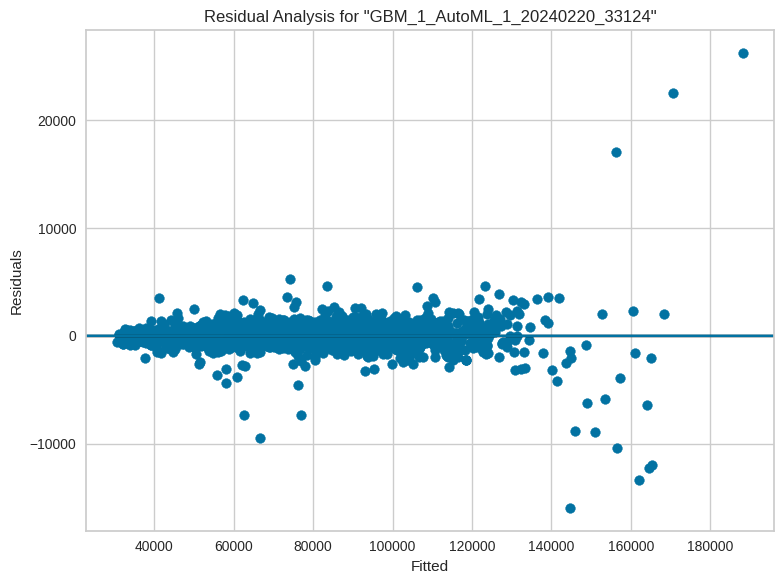

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

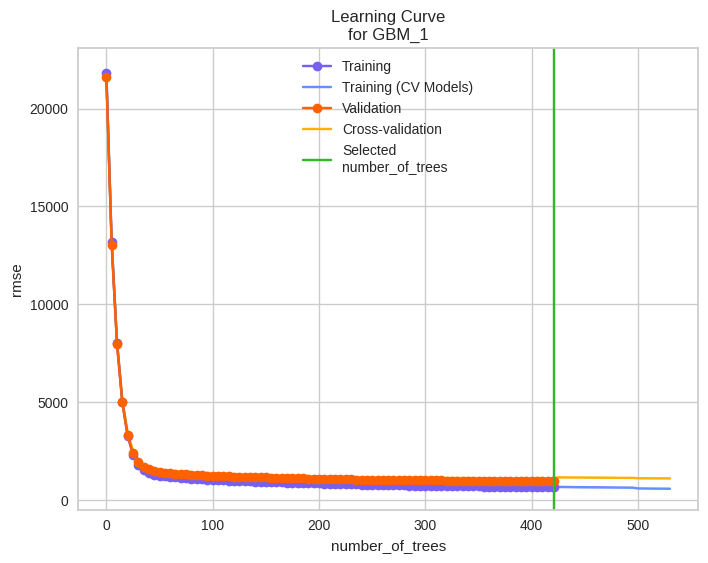

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

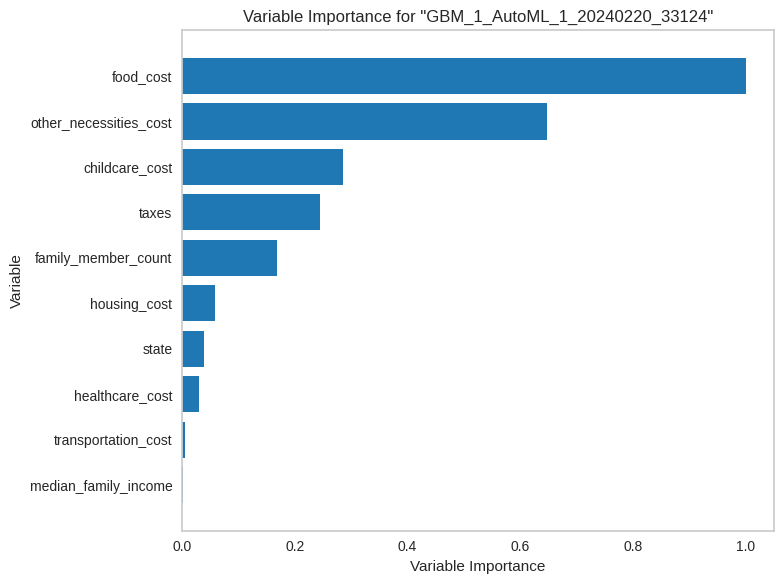

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

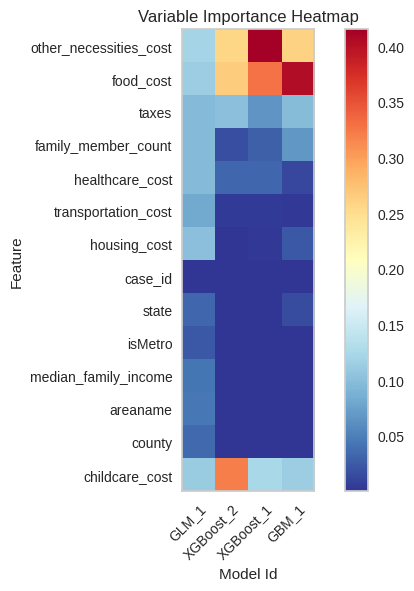

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

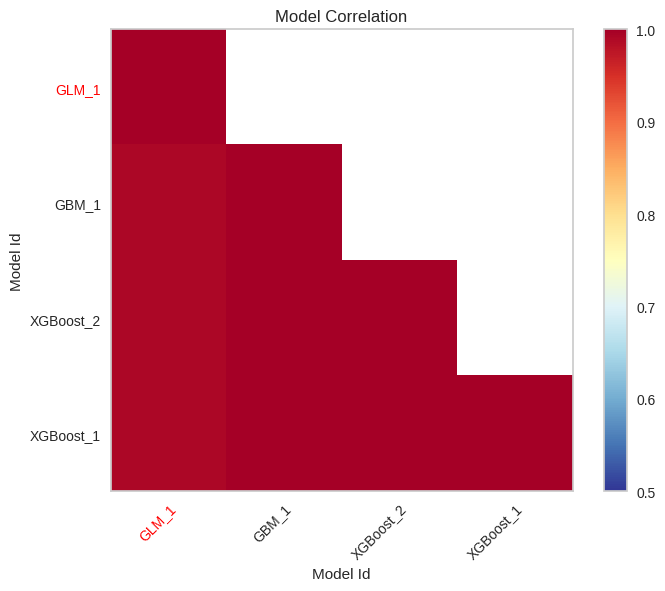

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

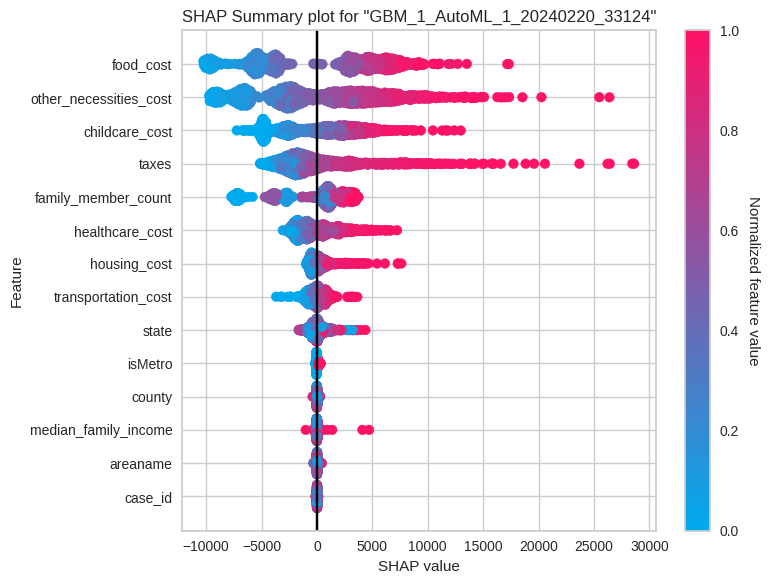

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

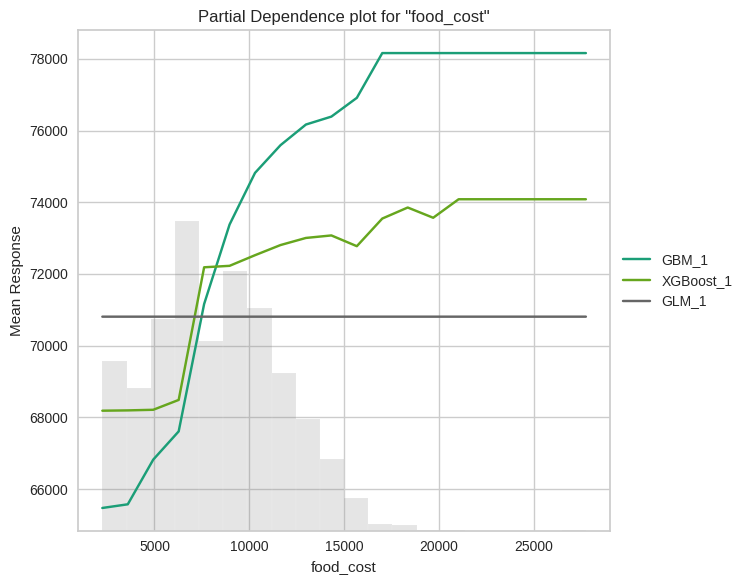

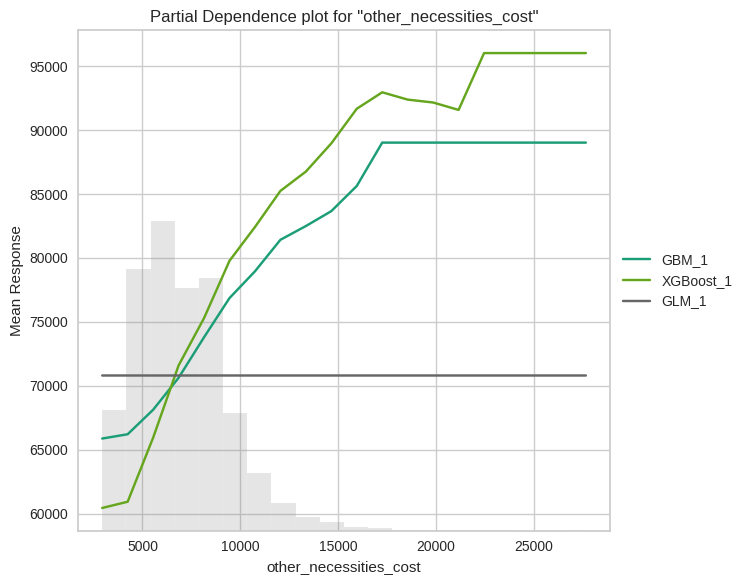

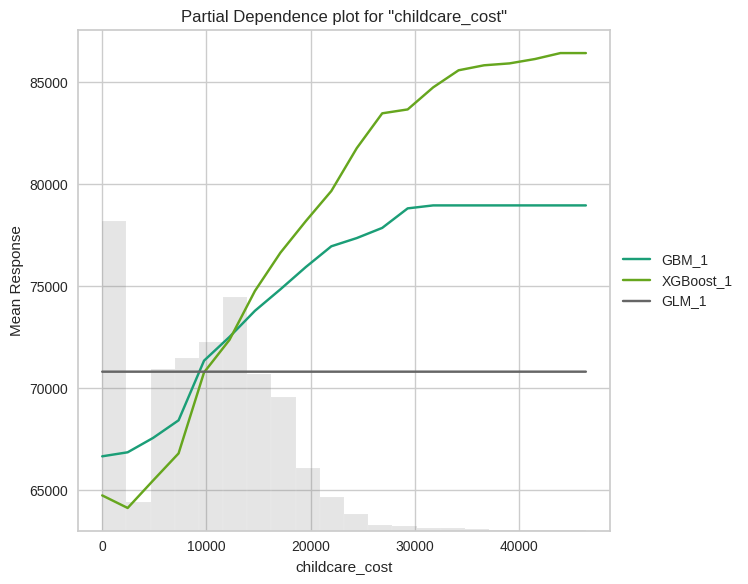

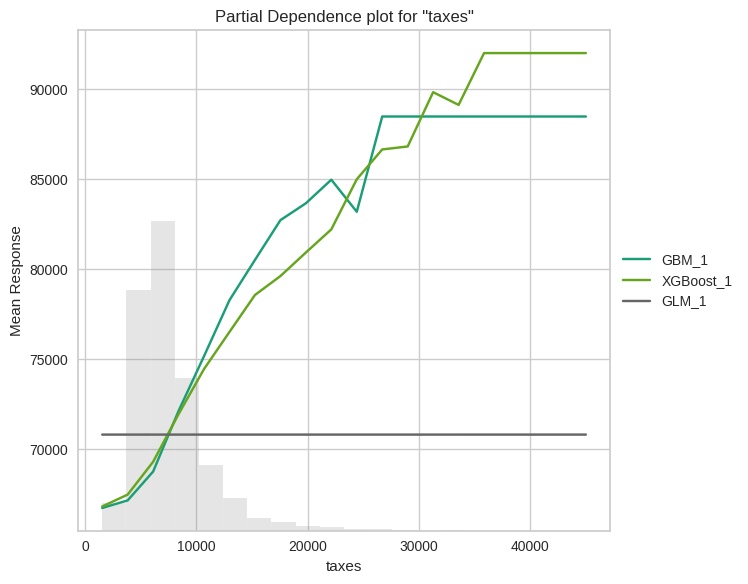

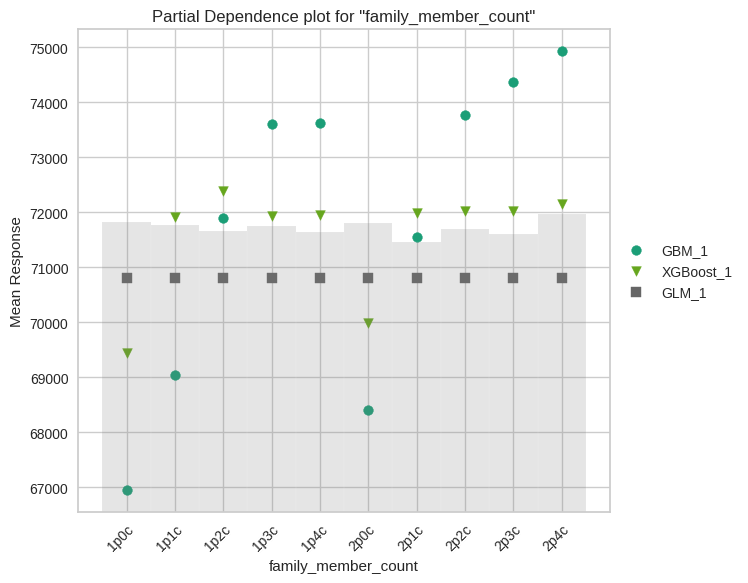

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

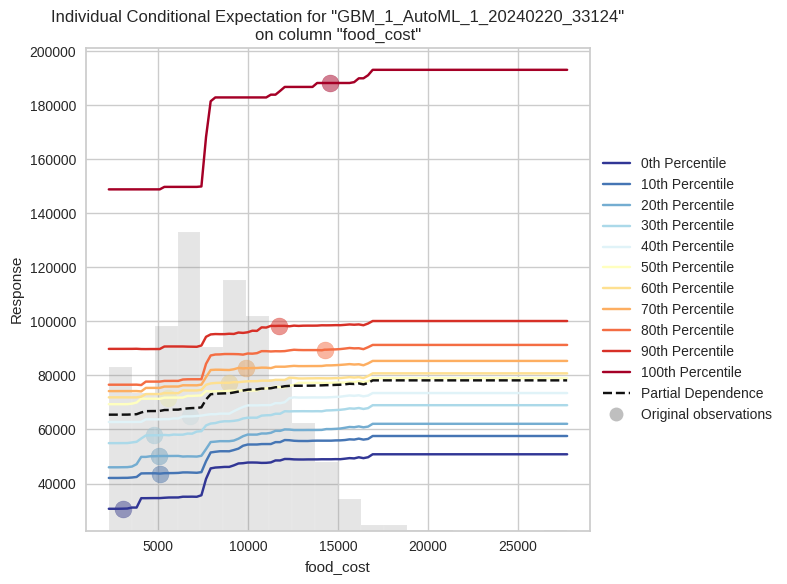

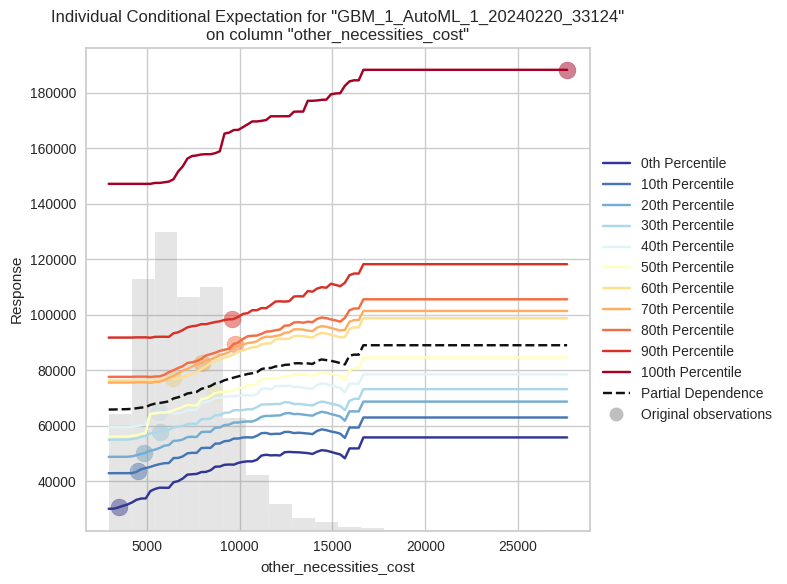

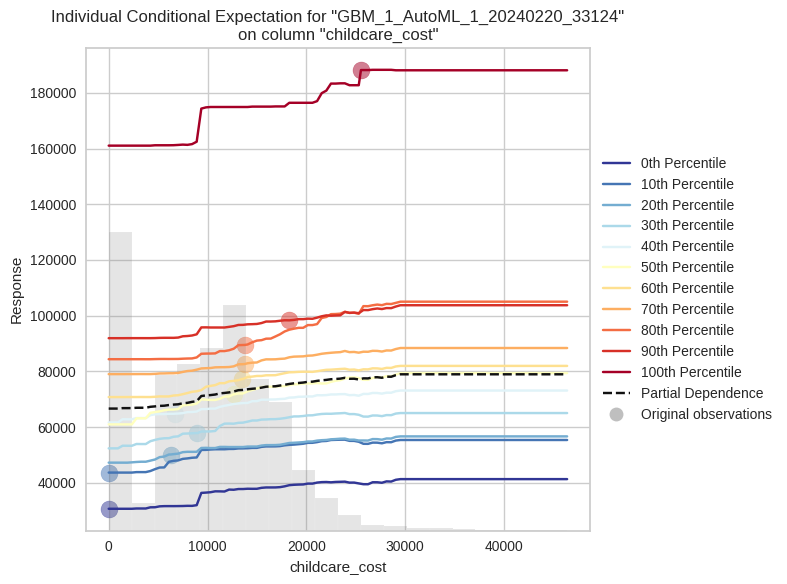

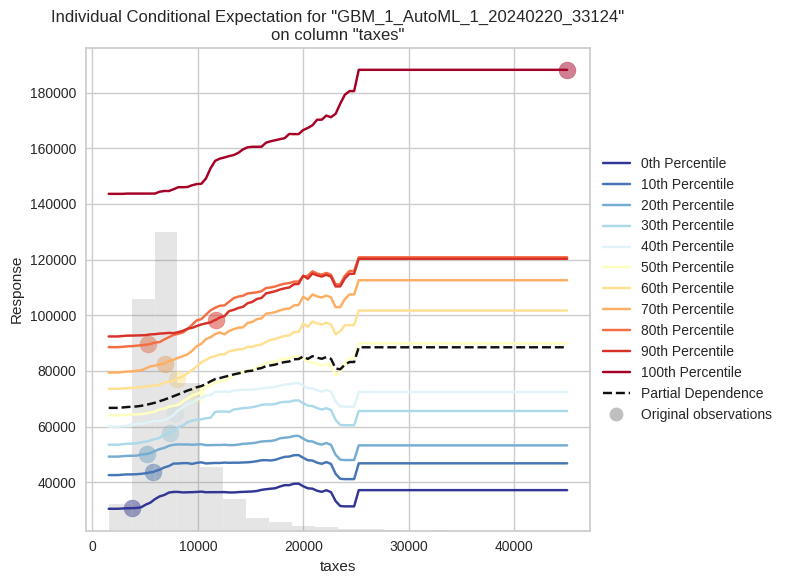

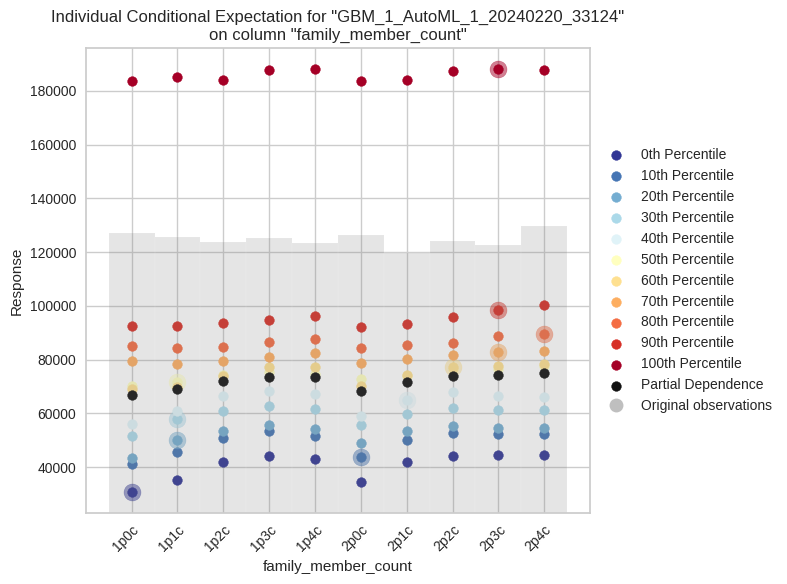

In [20]:
explain_model = aml.explain(frame = test, figsize = (8,6))

# **Residual Analysis:**

The residual plot indicates a good model fit, with most residuals clustering around zero and showing no apparent patterns that would suggest model issues.

# **Learning Curve Plot:**

The learning curve exhibits a small gap between training and validation errors, indicating the model is well-calibrated and neither overfitting nor underfitting.

# **Variable Importance:**

Food_cost, other_necessities_cost, and childcare_cost emerge as the most influential predictors, with food_cost consistently showing the highest impact across models.

Taxes and family_member_count also significantly affect predictions, though to a lesser extent than the aforementioned variables.

Housing_cost, state, healthcare_cost, transportation_cost, and median_family_income display lesser importance, suggesting they have a smaller influence on model outcomes.

# **Variable Importance Heatmap:**

The heatmap demonstrates that other_necessities_cost and food_cost are key drivers across multiple models, particularly for GBM and XGBoost.

There is moderate importance attributed to taxes and family_member_count, while housing_cost and median_family_income appear to have a minimal impact.

# **Model Correlation:**

The correlation plot shows a high agreement between the model predictions, indicating similar performance across different models.

# **SHAP Summary:**

The SHAP summary plot aligns with the variable importance findings, highlighting food_cost and other_necessities_cost as having the most substantial impact on predictions.

# **Partial Dependence Plots:**

These plots show a positive and strong relationship between the mean response and food_cost, other_necessities_cost, and childcare_cost, corroborating their importance.

Family_member_count also shows varying levels of impact, particularly in the GBM and XGBoost models.

# **Individual Conditional Expectation (ICE):**

The ICE plots for food_cost, other_necessities_cost, and childcare_cost illustrate that these variables have a pronounced effect on individual predictions, with variability across different percentiles, particularly noticeable in the extreme values, reinforcing their significant role in the model's decision-making process.

# **Leaderboard:**

The leaderboard metrics suggest that XGBoost models generally perform better than GBM and GLM in terms of RMSE, with XGBoost_1 having the lowest RMSE followed by XGBoost_2.
The GLM model has a significantly higher RMSE, indicating less predictive accuracy compared to the tree-based models.

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select variables for which to compute VIF
selected_variables = data[['housing_cost', 'food_cost', 'transportation_cost', 'healthcare_cost', 'other_necessities_cost', 'taxes']]

# Compute VIF
vif_data = pd.DataFrame()
vif_data["variables"] = selected_variables.columns
vif_data["VIF"] = [variance_inflation_factor(selected_variables.values, i) for i in range(selected_variables.shape[1])]

vif_data


,variables,VIF
0,housing_cost,1.958087e+14
1,food_cost,1.112000e+14
2,transportation_cost,1.708682e+01
3,healthcare_cost,2.829403e+01
4,other_necessities_cost,6.004800e+14
5,taxes,1.601525e+01



The VIF results indicate significant multicollinearity for several variables, particularly housing_cost, food_cost, and other_necessities_cost.

# **Re-executing AutoML with reduced columns**

Removing Transport cost and other necessitites cost

In [22]:
# Dropping 'transportation_cost' and 'other_necessities_cost' from the dataset
reduced_data = data.drop(['transportation_cost', 'other_necessities_cost'], axis=1)

# Display the first few rows of the updated dataset to confirm the changes
reduced_data.head()


,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,healthcare_cost,childcare_cost,taxes,total_cost,median_family_income
0,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.72876,3454.91712,5737.47984,0.0000,6392.94504,39254.0532,73010.414062
1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50240,5091.70788,8659.55640,6147.8298,7422.07836,57194.3256,73010.414062
2,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.50240,7460.20308,11581.63260,15824.6940,9769.56228,76141.0308,73010.414062
3,AL,True,"Montgomery, AL MSA",Autauga County,1p3c,15257.15040,9952.23924,14503.70760,18802.1892,13101.70320,94203.5328,73010.414062
4,AL,True,"Montgomery, AL MSA",Autauga County,1p4c,15257.15040,12182.21400,17425.78560,18802.1892,13469.21880,100823.5200,73010.414062


In [23]:
hf1 = h2o.H2OFrame(reduced_data)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [24]:
train1, valid1, test1 = hf1.split_frame(ratios=[.7, .15], seed=1234)
# Summary of the split
print("Training set:", train1.shape)
print("Validation set:", valid1.shape)
print("Test set:", test1.shape)

Training set: (22104, 12)
Validation set: (4609, 12)
Test set: (4717, 12)


In [27]:
from h2o.automl import H2OAutoML

# Define X (features) and y (target)
y1 = 'total_cost'
X1 = hf.columns
X1.remove(y1)

X1.remove('transportation_cost')  # Ensuring there are no removed columns in the new features
X1.remove('other_necessities_cost')
X1.remove('case_id')

# Run AutoML
# Run AutoML for 10 base models (limited to 1 hour max runtime by default)
aml1 = H2OAutoML(max_models=10, seed=1234, sort_metric="MAE", max_runtime_secs=600)
aml1.train(x=X1, y=y1, training_frame=train1, validation_frame=valid1, leaderboard_frame=test1)

AutoML progress: |
03:52:42.323: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_2_20240220_35242


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    417                417                         663868                 10           15           14.7626       22            140           72.8345

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 515788.79919471685
RMSE: 718.1843768801413
MAE: 244.31721112765223
RMSLE: 0.0062446041230433
Mean Residual Deviance: 515788.79919471685

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 969776.383902764
RMSE: 984.7722497627377
MAE: 500.9436290183683
RMSLE: 0.010563539450978906
Mean Residual Deviance: 969776.383902764

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 1342060.7182592566
RMSE: 1158.4734430530796
MAE: 543.0388364108474
RMSLE: 0.012122986107664225
Mean Residual Deviance: 1342060.7182592566

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     542.896      10.9654      526.362       551.736       547.341       551.745       537.295
mean_residual_deviance  1.34212e+06  258332       1.0267e+06    1.191e+06     1.61997e+06   1.59397e+06   1.27898e+06
mse                     1.34212e+06  258332       1.0267e+06    1.191e+06     1.61997e+06   1.59397e+06   1.27898e+06
r2                      0.997176     0.000568074  0.997847      0.997455      0.996543      0.996622      0.997413
residual_deviance       1.34212e+06  258332       1.0267e+06    1.191e+06     1.61997e+06   1.59397e+06   1.27898e+06
rmse                    1154.16      111.975      1013.26       1091.33       1272.78       1262.52       1130.92
rmsle                   0.0121154    0.000504252  0.0123041     0.0119411     0.0128915     0.0118542     0.0115858

Scoring History: 
     timestamp            duration          number_of_trees    training_rmse       training_mae        training_deviance    validation_rmse     validation_mae      validation_deviance
---  -------------------  ----------------  -----------------  ------------------  ------------------  -------------------  ------------------  ------------------  ---------------------
     2024-02-20 03:59:08  2 min 16.821 sec  0.0                21816.18696013254   17529.62080934245   475946013.4794572    21607.49467069235   17408.397417900567  466883825.9439983
     2024-02-20 03:59:08  2 min 17.098 sec  5.0                13214.117586184344  10505.82118859638   174612903.58150634   13073.519142765905  10438.818283154398  170916902.77626657
     2024-02-20 03:59:08  2 min 17.419 sec  10.0               8076.409449103017   6330.418747296162   65228389.58956051    8007.72777292027    6289.126553048688   64123704.08519862
     2024-02-20 03:59:09  2 min 17.712 sec  15.0               5070.792572023894   3857.87451922941    25712937.308492698   5069.508525249516   3848.9515453713443  25699916.687577527
     2024-02-20 03:59:09  2 min 18.038 sec  20.0               3337.5530592887953  2400.794139617688   11139260.423567997   3405.6389325365903  2432.8108354956303  11598376.538808968
     2024-02-20 03:59:09  2 min 18.340 sec  25.0               2391.421063002997   1570.79224322026    5718894.700574385    2519.992407122723   1633.5297924668575  6350361.7319561755
     2024-02-20 03:59:10  2 min 18.677 sec  30.0               1889.4999803908502  1107.9230849231192  3570210.175897023    2061.8644883680527  1197.7767662397303  4251285.1683932515
     2024-02-20 03:59:10 

In [28]:
# Run AutoML for 10 base models (limited to 1 hour max runtime by default)
#aml1 = H2OAutoML(max_models=10, seed=1234, sort_metric="MAE", max_runtime_secs=600)
#aml1.train(x=X1, y=y1, training_frame=train1, validation_frame=valid1, leaderboard_frame=test1)

In [29]:
# View the AutoML Leaderboard
lb1 = aml1.leaderboard
lb1.head(rows=lb1.nrows)  # Shows all rows of leaderboard


model_id,mae,rmse,mse,rmsle,mean_residual_deviance
GBM_1_AutoML_2_20240220_35242,526.332,1140.18,1.30002e+06,0.0121311,1.30002e+06
XGBoost_1_AutoML_2_20240220_35242,726.404,1078.16,1.16243e+06,0.0143909,1.16243e+06
GLM_1_AutoML_2_20240220_35242,17910.2,22216.8,4.93586e+08,0.328287,4.93586e+08


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
XGBoost_1_AutoML_2_20240220_35242,1078.16,1.16243e+06,726.404,0.0143909,1.16243e+06,34112,0.04265,XGBoost
GBM_1_AutoML_2_20240220_35242,1140.18,1.30002e+06,526.332,0.0121311,1.30002e+06,28189,0.264898,GBM
GLM_1_AutoML_2_20240220_35242,22216.8,4.93586e+08,17910.2,0.328287,4.93586e+08,663,0.000807,GLM


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

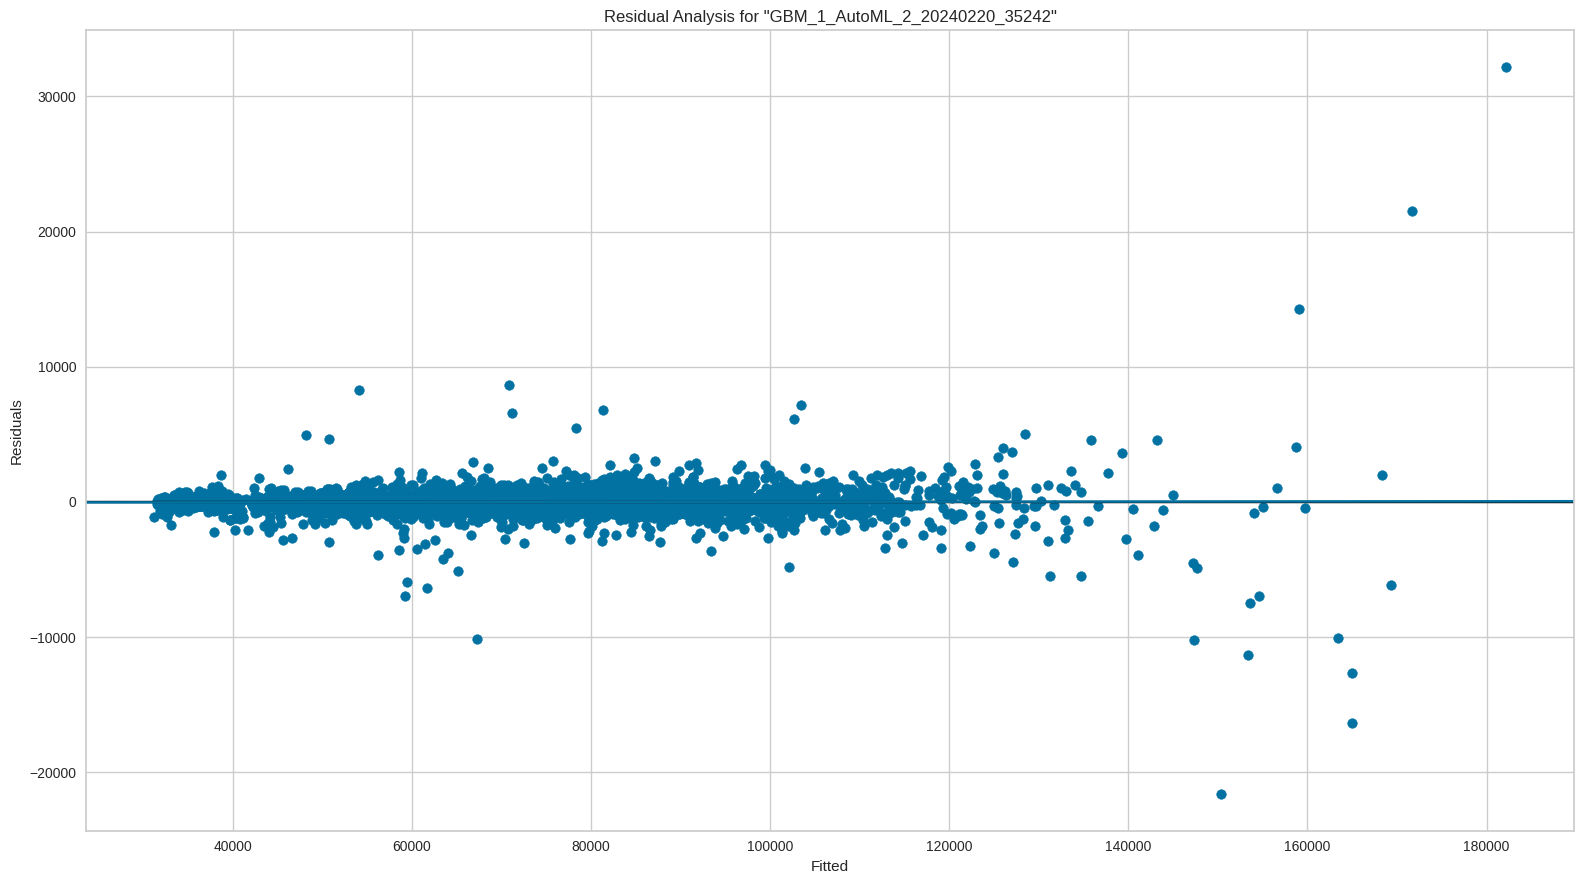

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

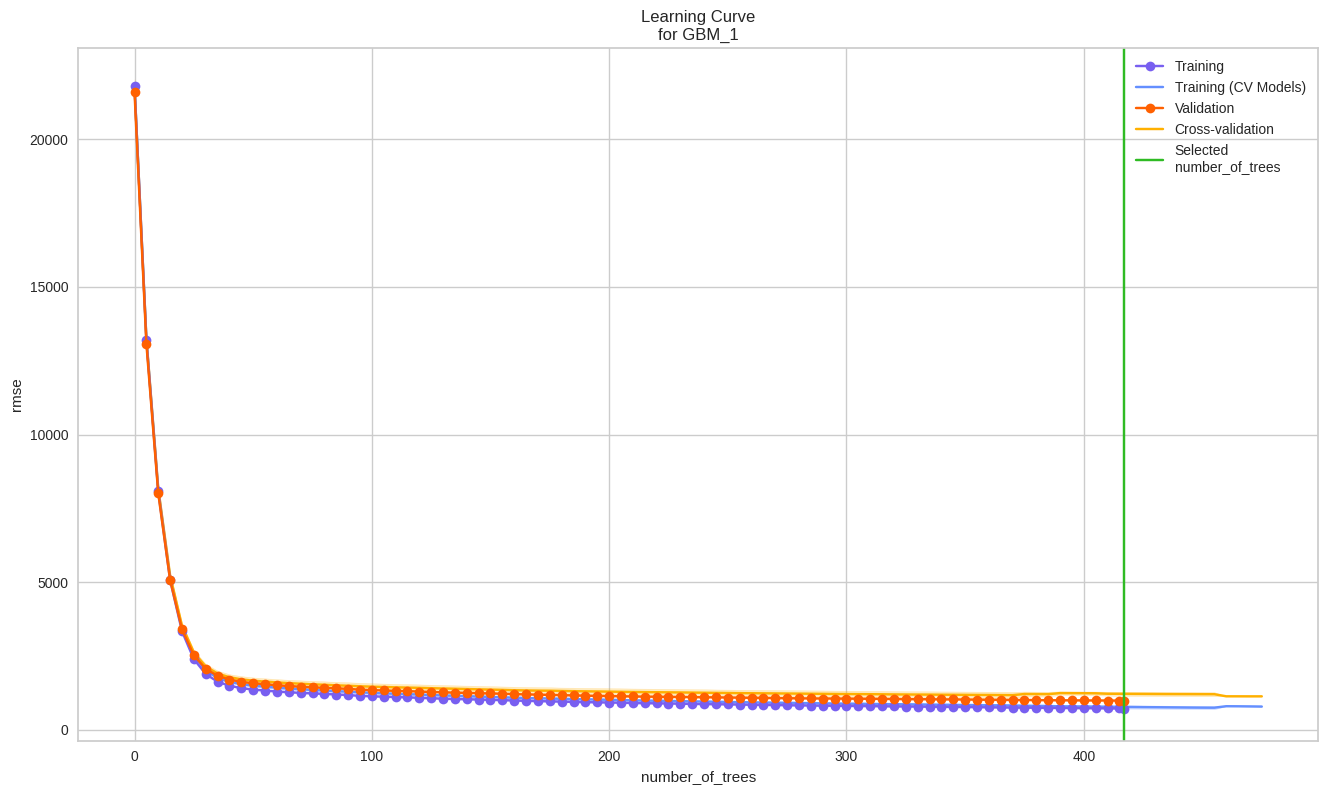

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

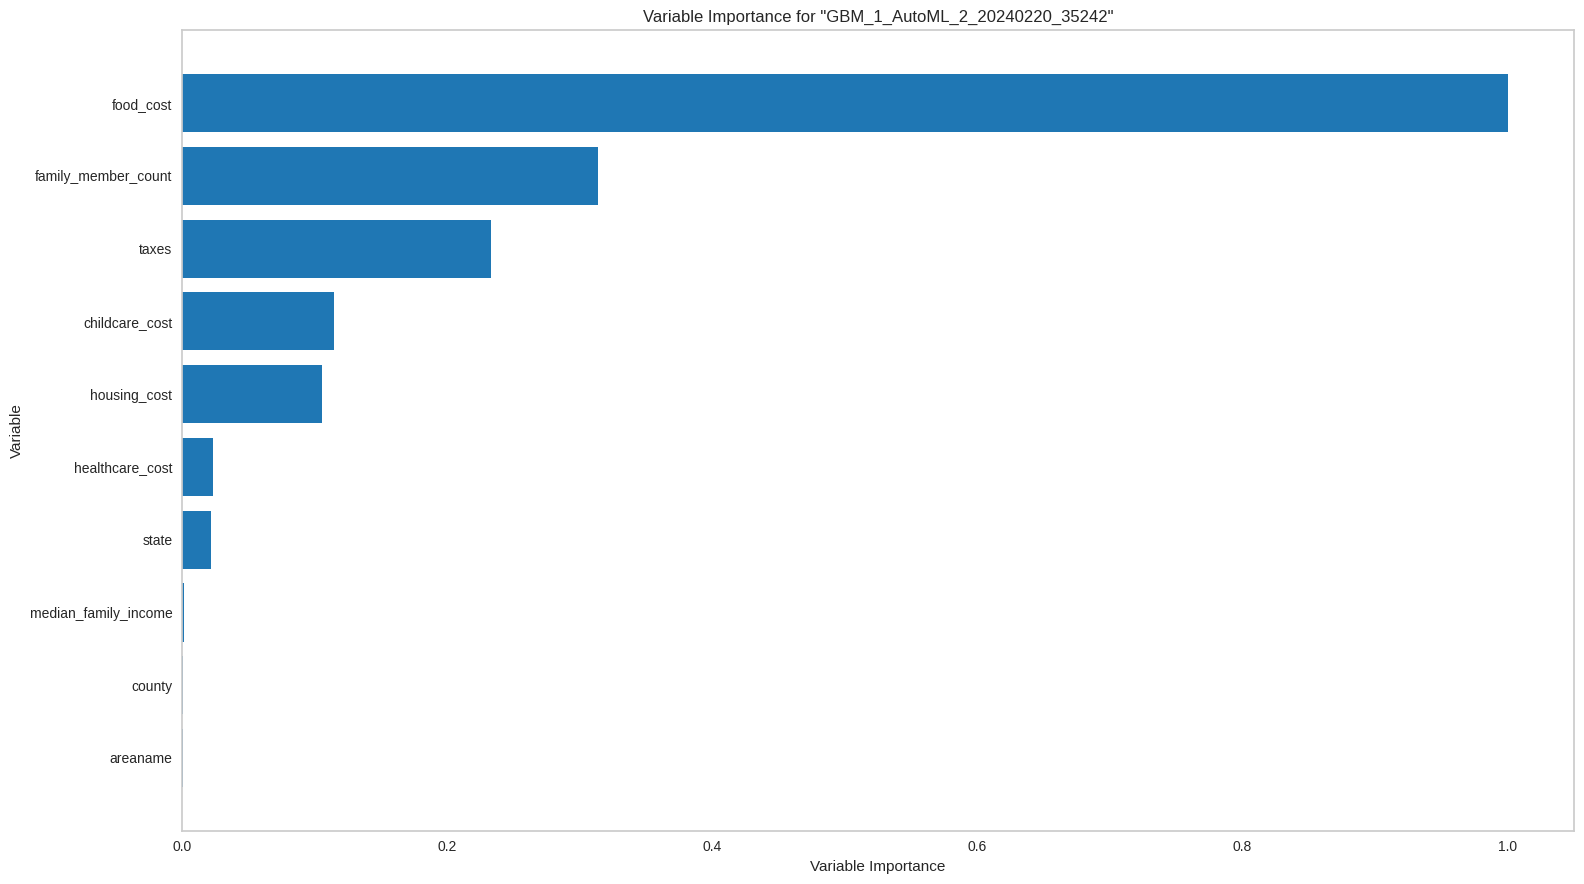

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

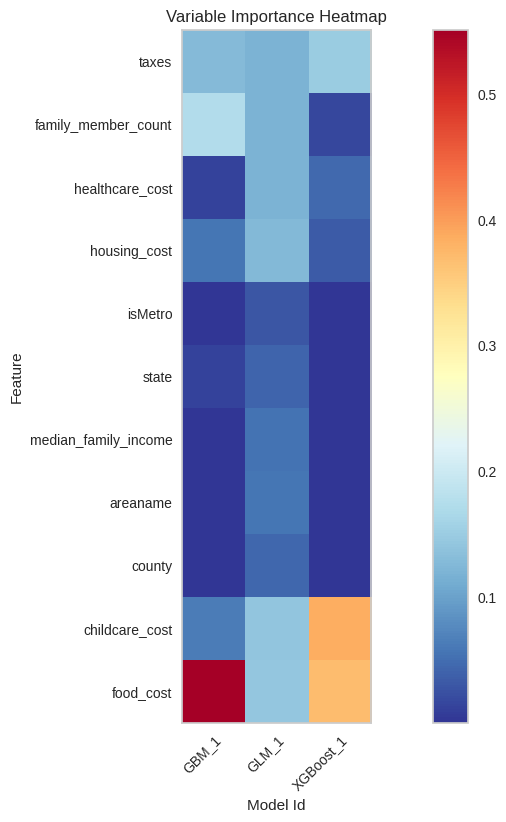

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

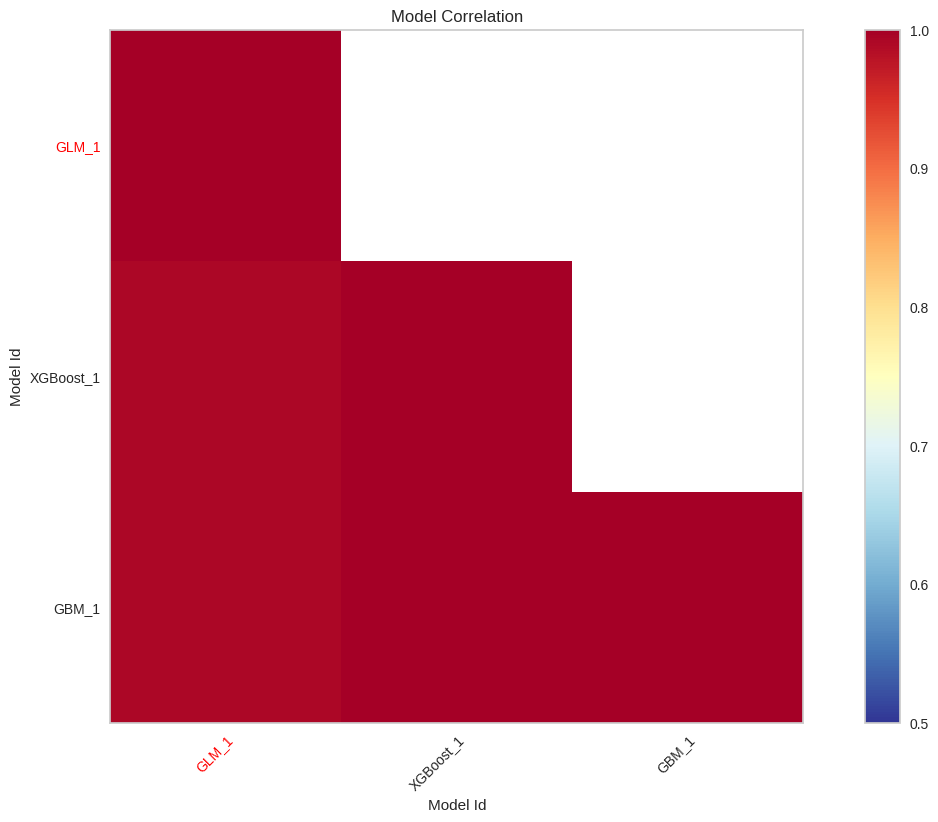

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

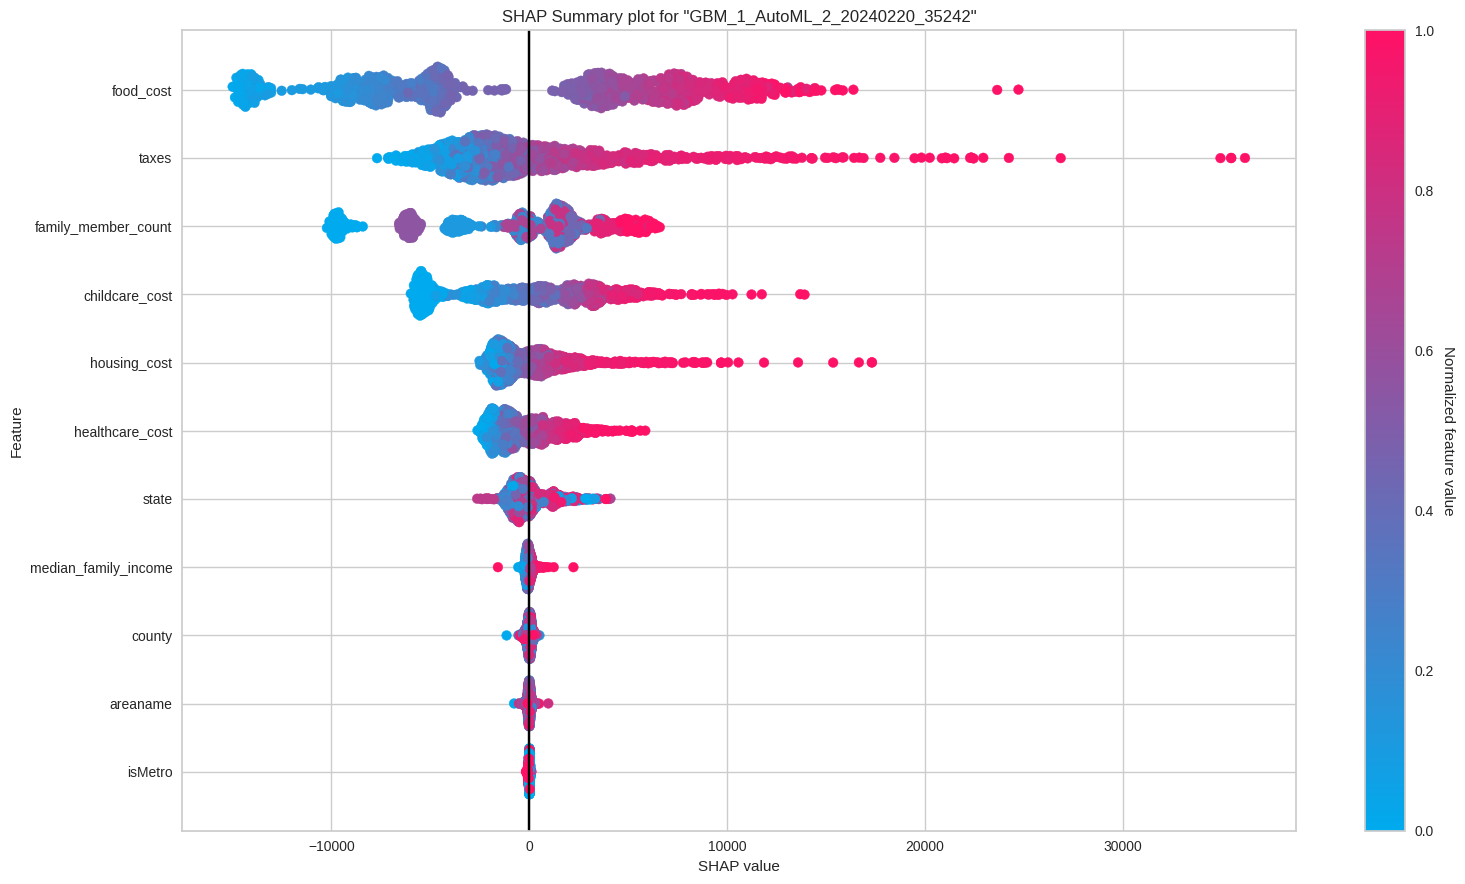

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

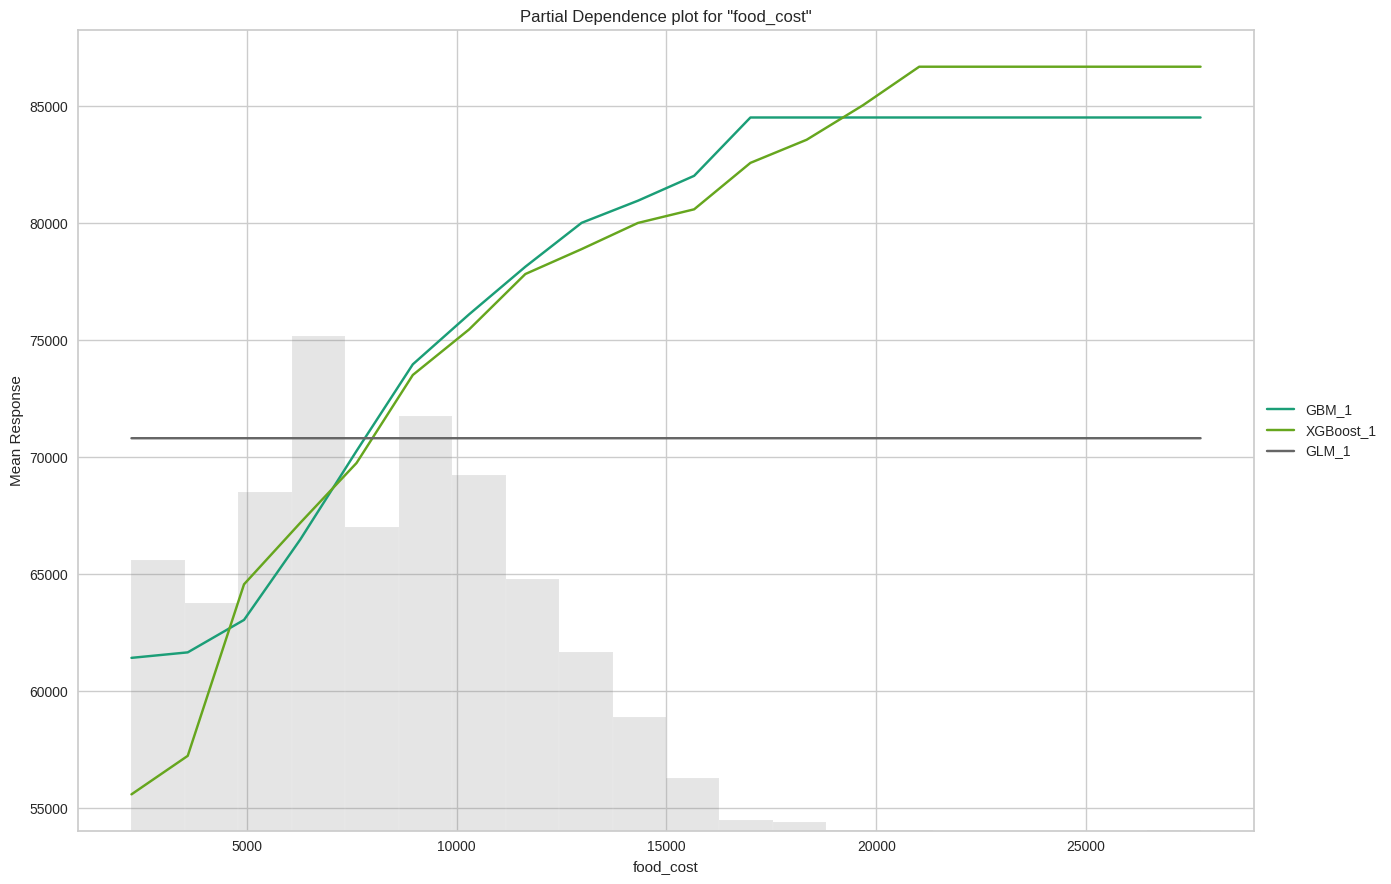

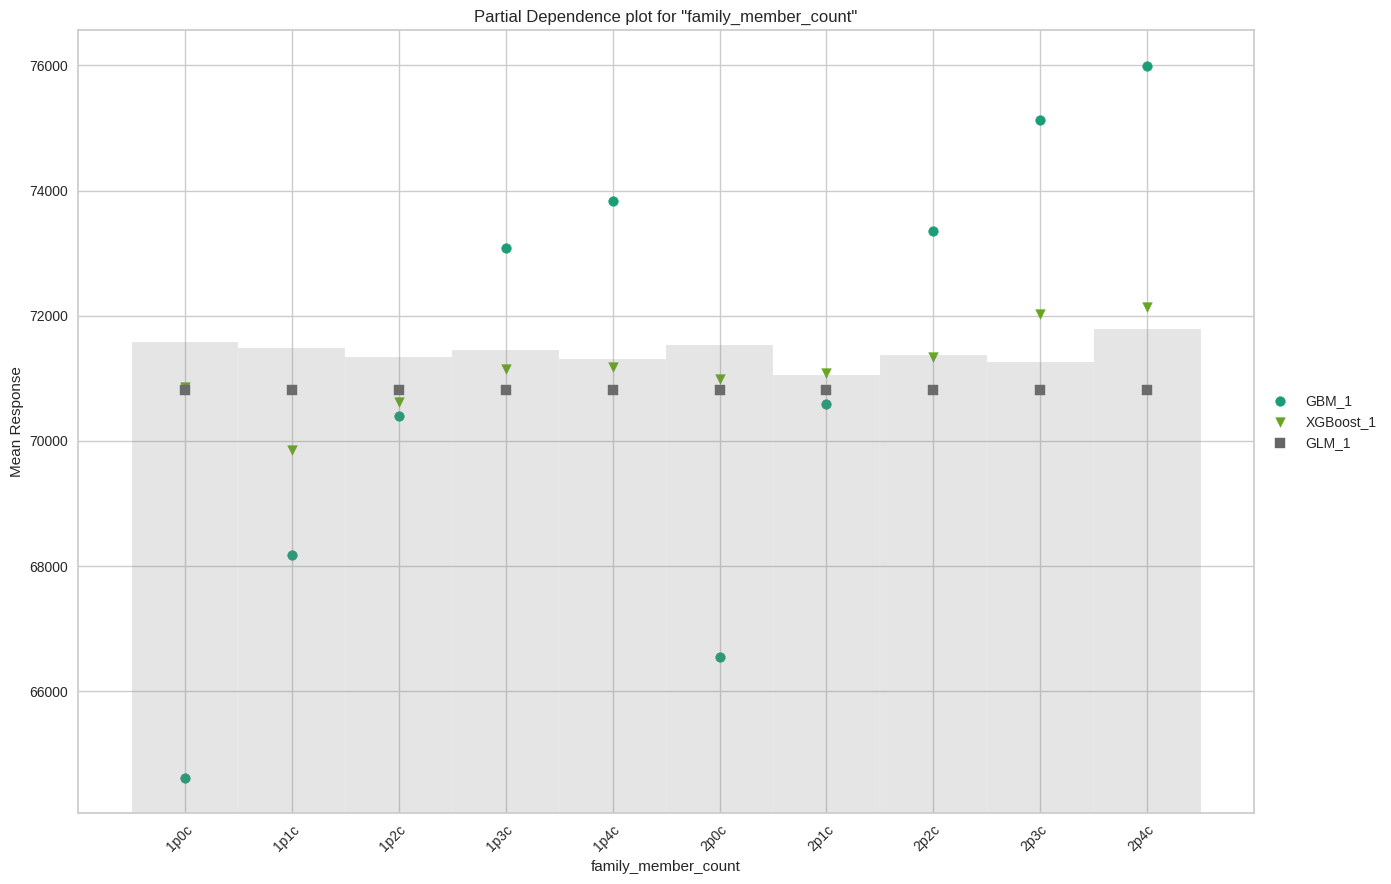

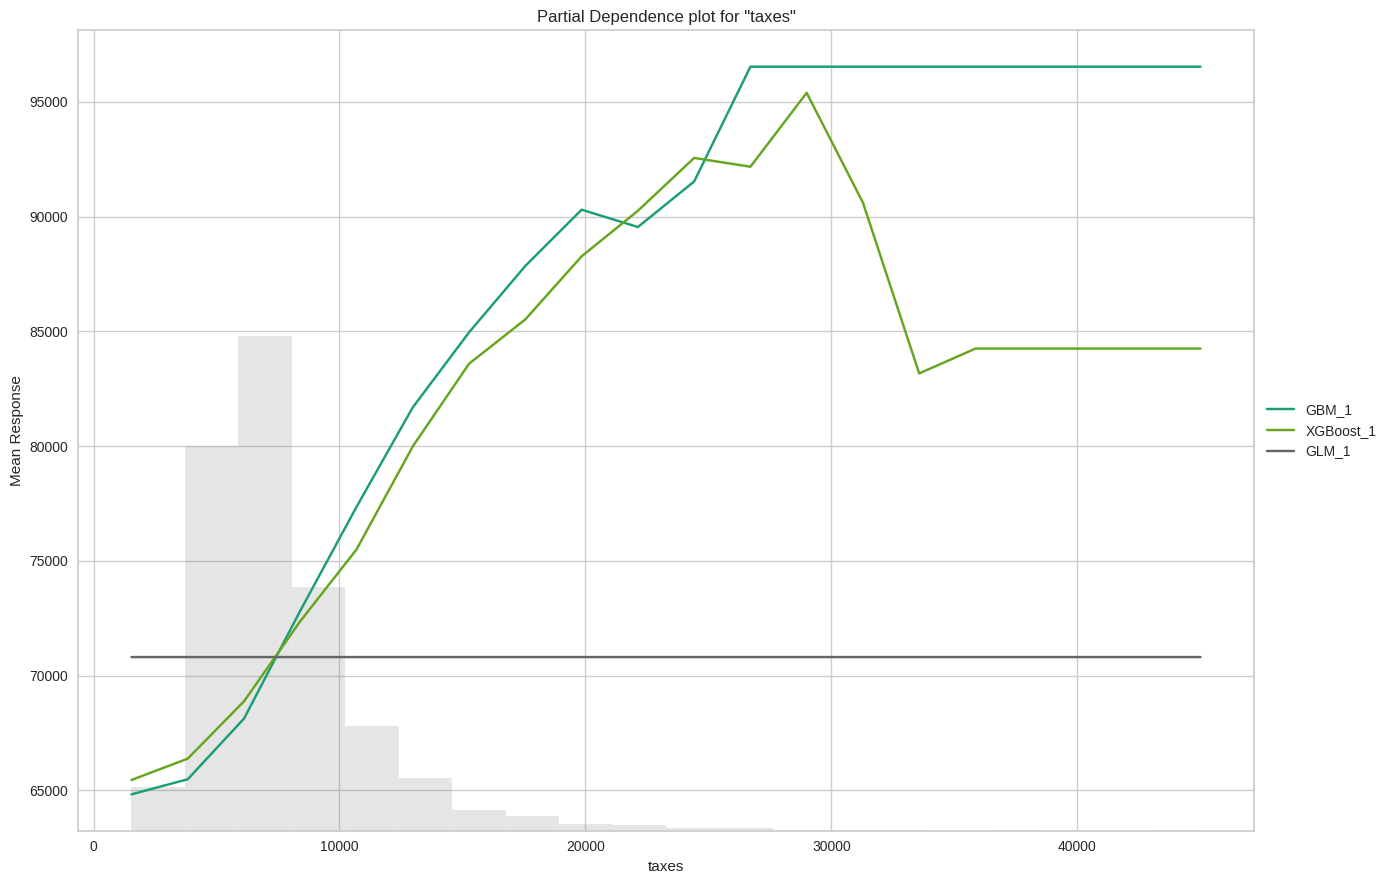

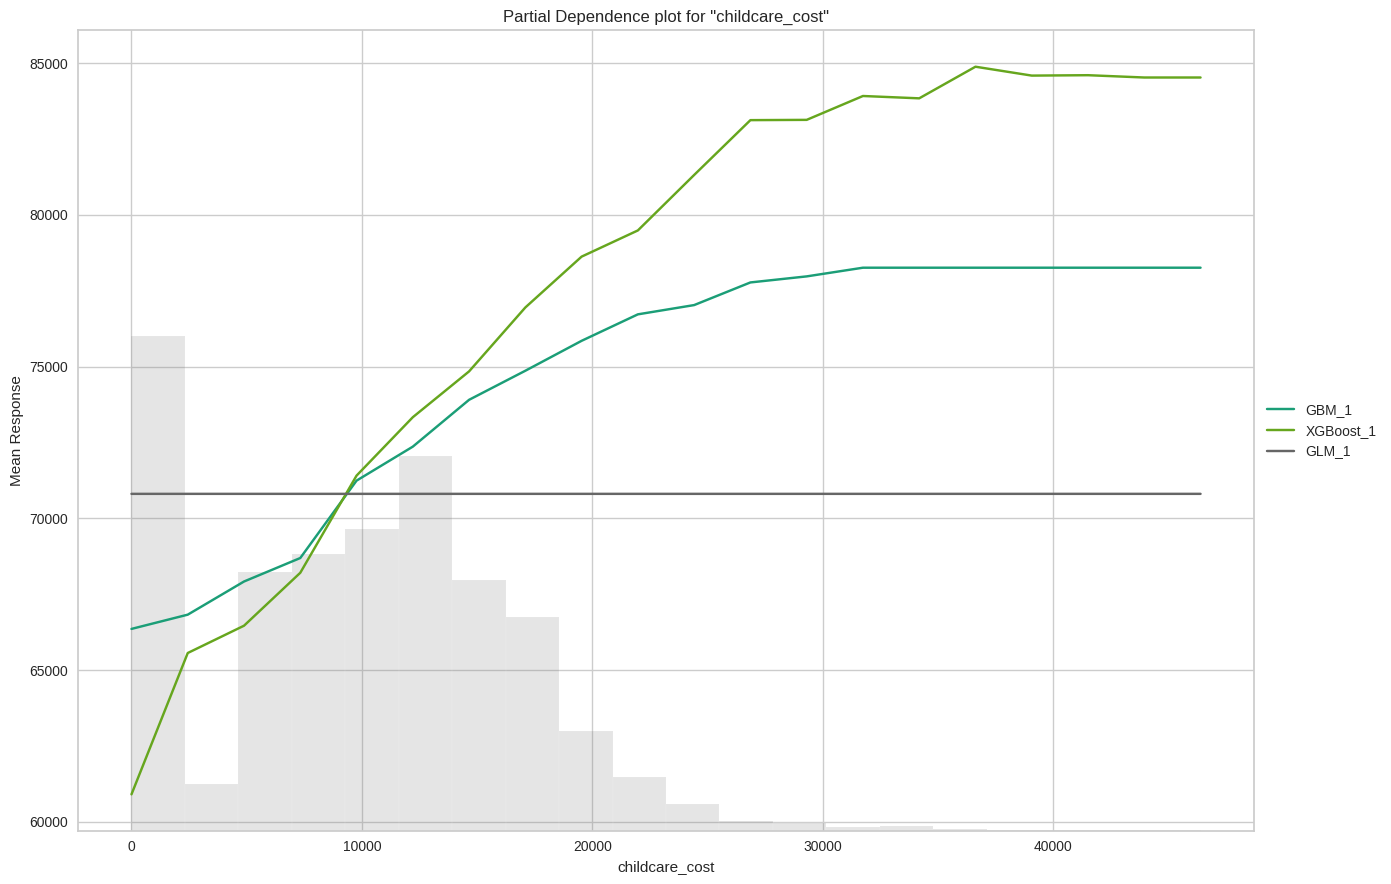

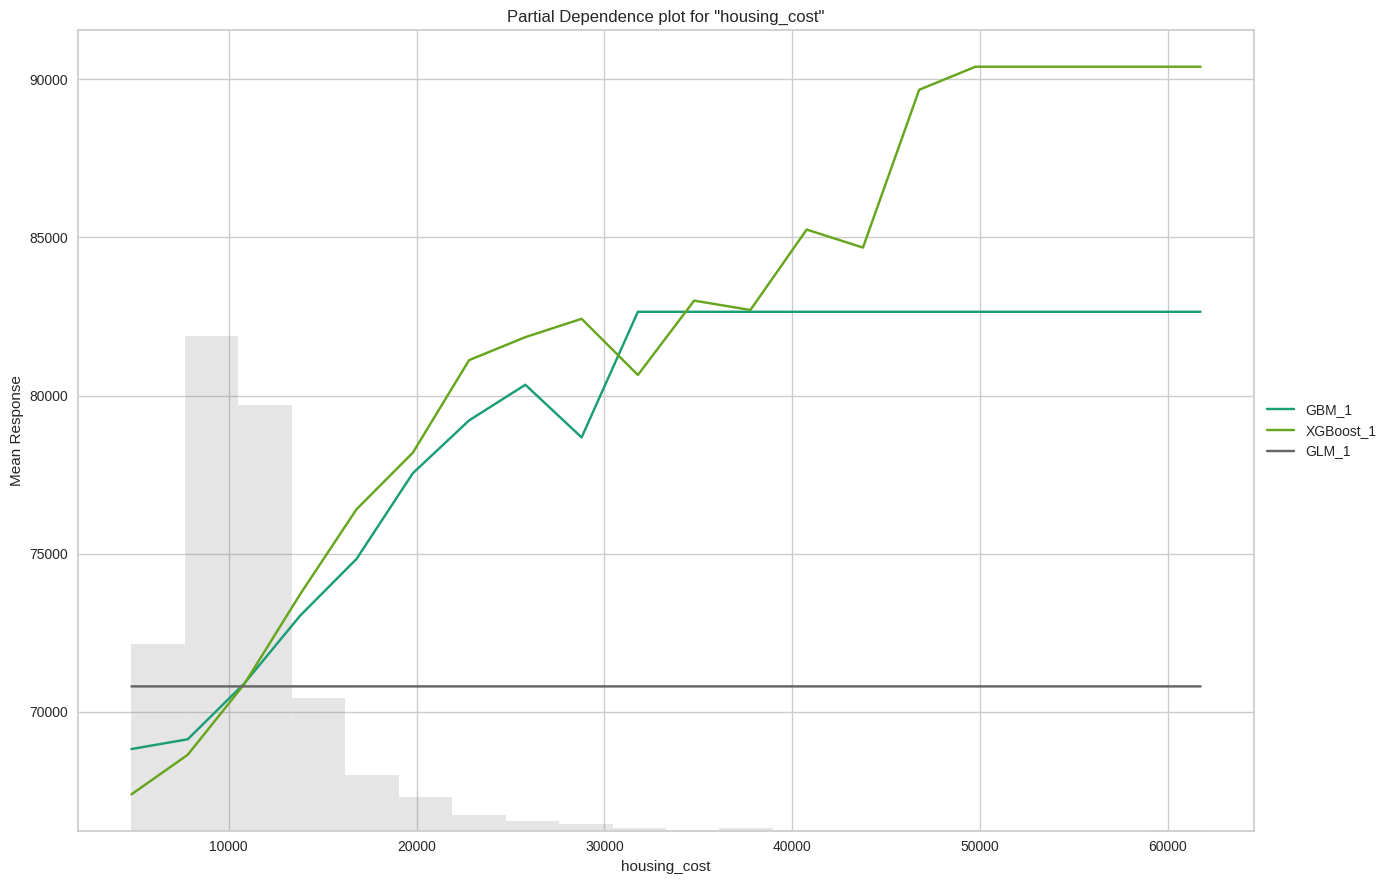

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

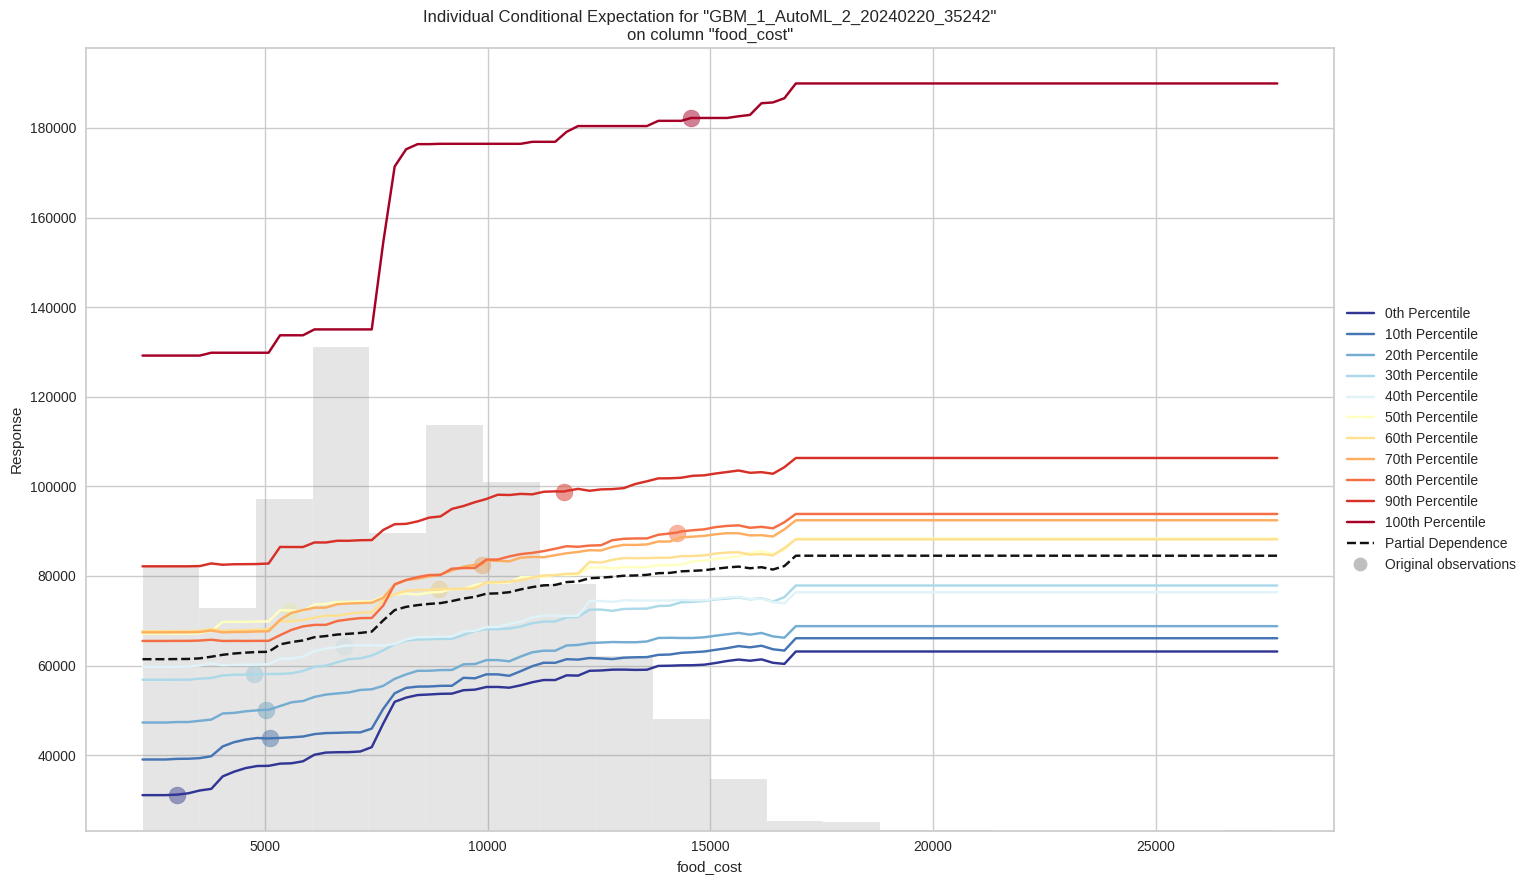

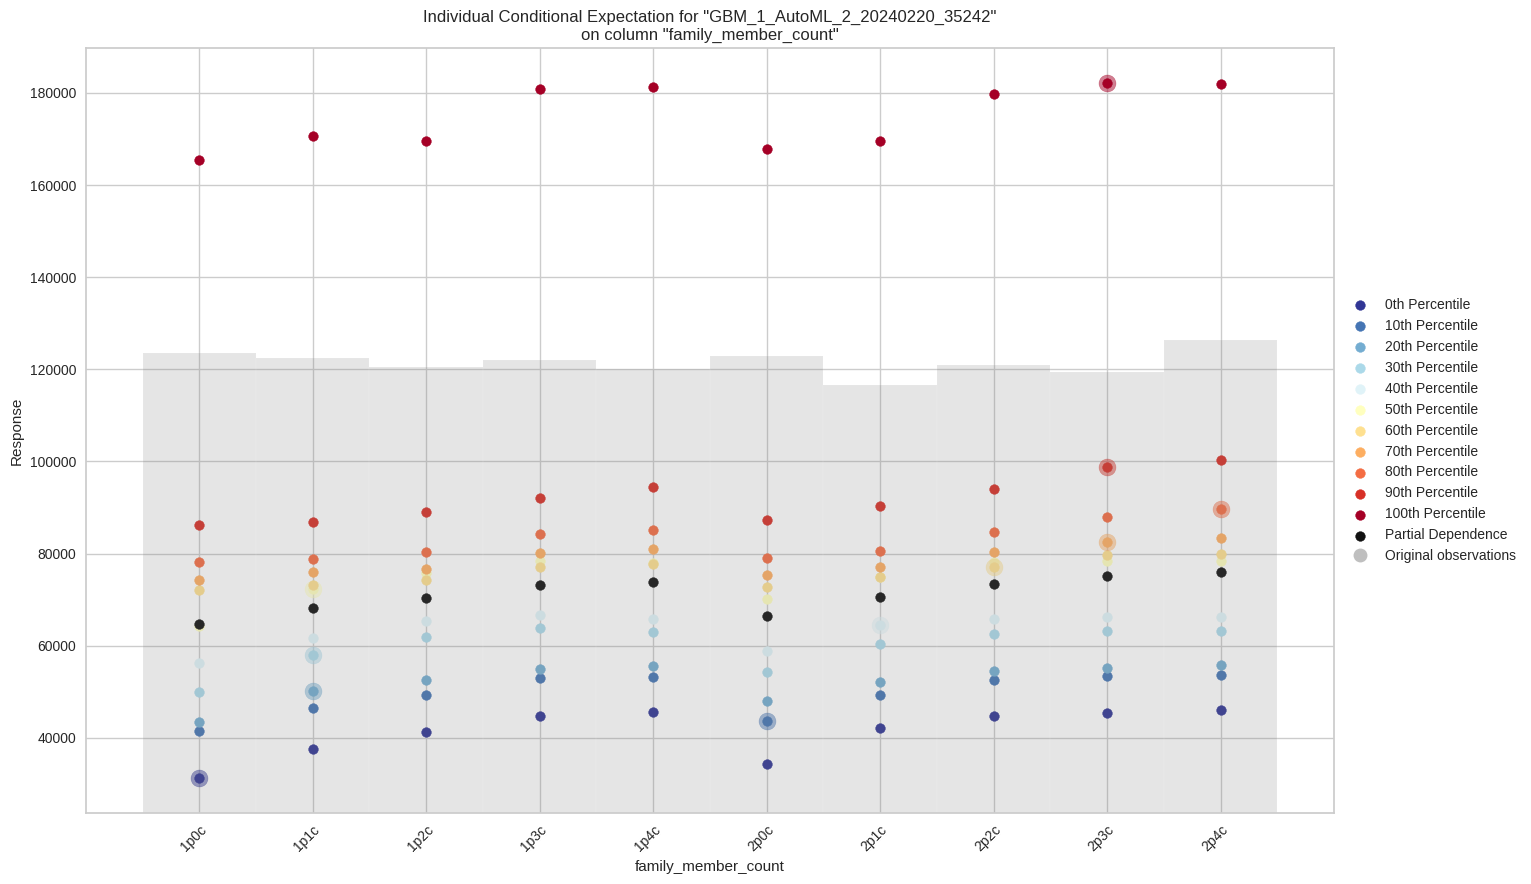

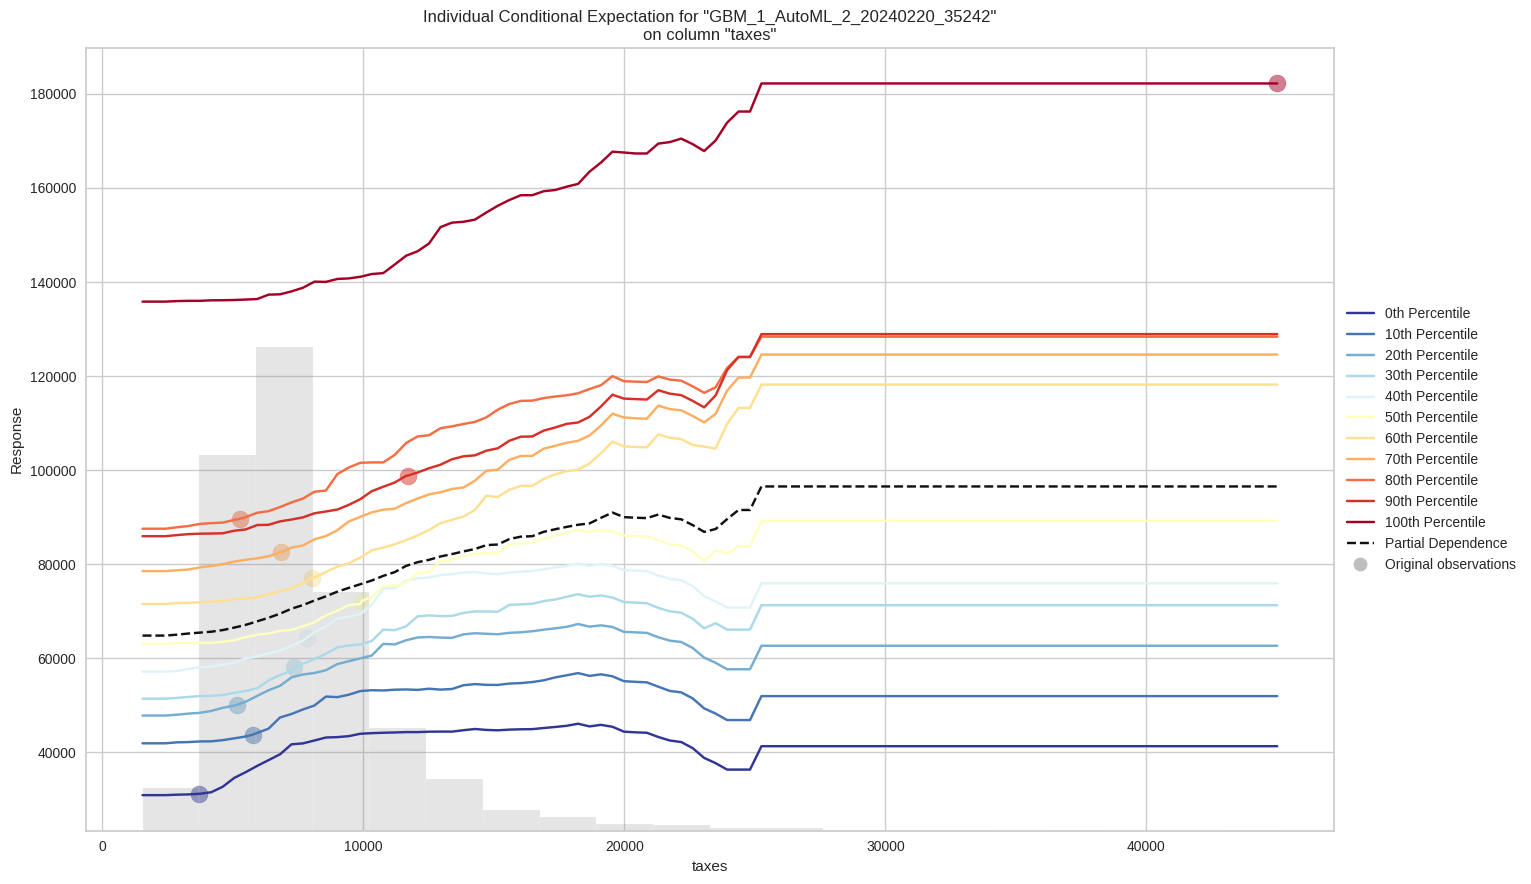

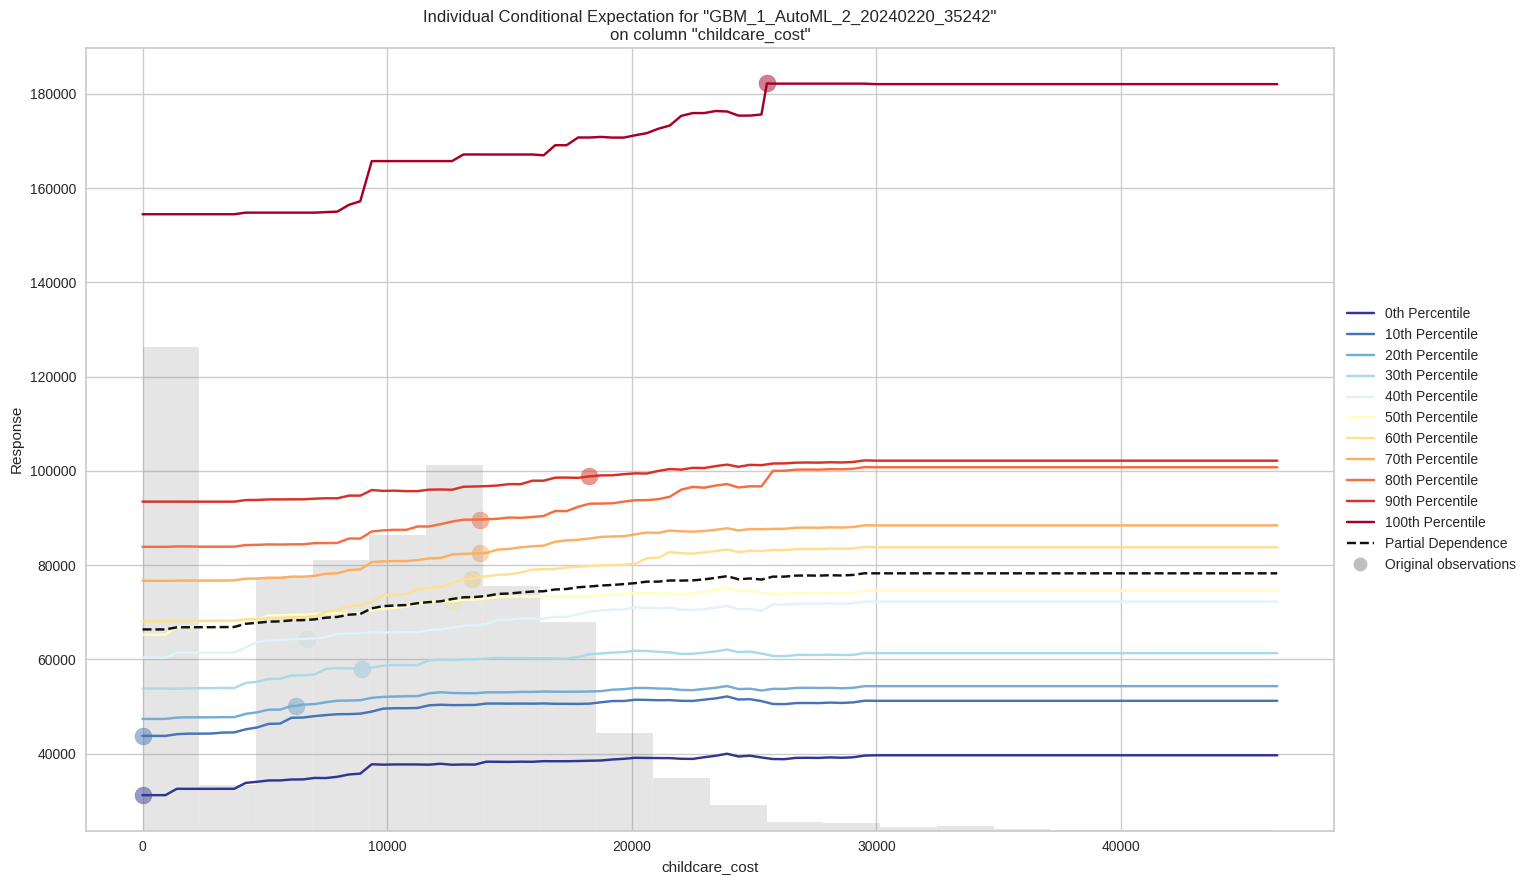

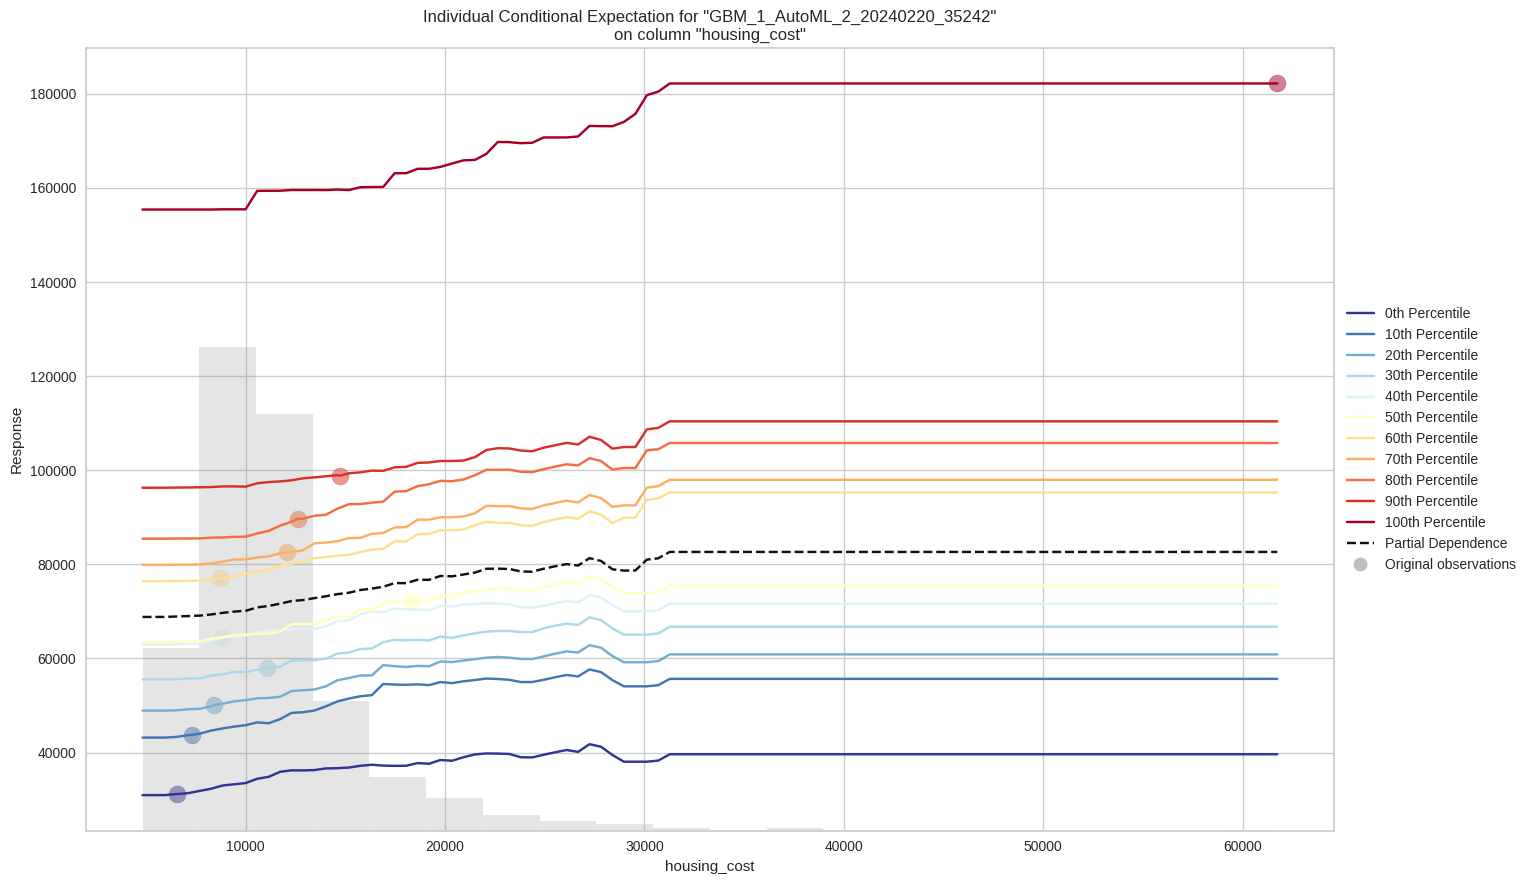

In [30]:
e = aml1.explain(test1)

# **Residual Analysis:**
Both executions display residuals scattered around the horizontal axis, indicating that the models are appropriately fitted without obvious patterns of heteroscedasticity or autocorrelation.

# **Learning Curve:**
The plots show a convergence of training and validation losses, with a small gap, suggesting that the models are neither overfitting nor underfitting.

# **Variable Importance Heatmaps:**
In the Variable Importance Heatmap, 'food_cost' is highly influential in the GLM model but not in GBM or XGBoost. 'Taxes', 'childcare_cost', and 'family_member_count' are moderately important across all models. 'Healthcare_cost', 'housing_cost', and 'isMetro' show varied importance, while 'state', 'median_family_income', 'areaname', and 'county' are least important.

# **Model Metrics:**
A marginal improvement in MAE is observed, though not substantial enough to indicate a major shift in model performance.

# **Partial Dependence:**
 These visualizations support the identified importance of features, with 'food_cost' and 'taxes' showing a strong impact on the model's predictions, while 'housing_cost' and 'family_member_count' have a more moderate effect.

# **Correlation:**
The model correlation plot indicates a strong agreement between the model predictions, especially between 'GBM_1' and 'XGBoost_1', suggesting that these models are capturing similar patterns in the data.

In conclusion, the re-execution of AutoML appears to have fine-tuned the model's understanding of feature importance, with slight adjustments in variable impact and a minor improvement in MAE. Overall, the model diagnostics indicate robust and well-fitted models.






Missing values in 'median_family_income' after filling: 0
housing_cost            float64
food_cost               float64
healthcare_cost         float64
childcare_cost          float64
taxes                   float64
total_cost              float64
median_family_income    float64
dtype: object
housing_cost            0
food_cost               0
healthcare_cost         0
childcare_cost          0
taxes                   0
total_cost              0
median_family_income    0
dtype: int64
Mean of Residuals -1.7240755434817392e-11


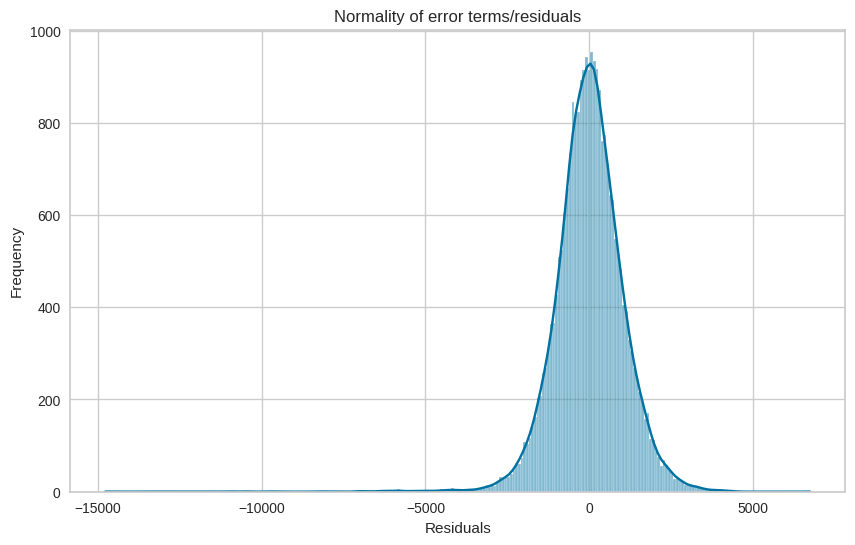

In [31]:
# Re-importing necessary libraries after reset
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# Import dataset
url = "https://raw.githubusercontent.com/Kotha-Nikhil/INFO-6105-Data-Science/main/cost_of_living_us.csv"
data = pd.read_csv(url)

# Selecting features and target for the analysis
target = 'total_cost'
features = data.columns.tolist()
features.remove(target)

#reduced_data = data.drop('case_id', axis=1)

# Drop columns with high VIF values to avoid multicollinearity
reduced_data = data.drop(['transportation_cost', 'other_necessities_cost','case_id','state','isMetro','areaname','county','family_member_count'], axis=1)

# Updating features list after dropping columns
features = reduced_data.columns.tolist()
features.remove(target)



# Calculate the mean of the median_family_income column
median_family_income_mean = reduced_data['median_family_income'].mean()

# Replace missing values in median_family_income with the mean
reduced_data['median_family_income'].fillna(median_family_income_mean, inplace=True)

# Check if there are any missing values left
missing_values_after = reduced_data['median_family_income'].isnull().sum()
print("Missing values in 'median_family_income' after filling:", missing_values_after)


# Separating dependent and independent variables
A = reduced_data[features]
B = reduced_data[target]
# Checking for non-numeric data and NaN values
print(reduced_data.dtypes)
print(reduced_data.isnull().sum())


# Splitting the data
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.2, random_state=42)

# Training the model
model = sm.OLS(B_train, sm.add_constant(A_train)).fit()

# Making predictions
B_pred = model.predict(sm.add_constant(A_train))

# Calculating residuals
residuals = B_train - B_pred
mean_residuals = np.mean(residuals)

# Output the mean of residuals
print(f"Mean of Residuals {mean_residuals}")

# Plotting the distribution of residuals
plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


In [32]:
# Checking for non-numeric data and NaN values
print(reduced_data.dtypes)
print(reduced_data.isnull().sum())


housing_cost            float64
food_cost               float64
healthcare_cost         float64
childcare_cost          float64
taxes                   float64
total_cost              float64
median_family_income    float64
dtype: object
housing_cost            0
food_cost               0
healthcare_cost         0
childcare_cost          0
taxes                   0
total_cost              0
median_family_income    0
dtype: int64


Mean of Residuals -1.7240755434817392e-11


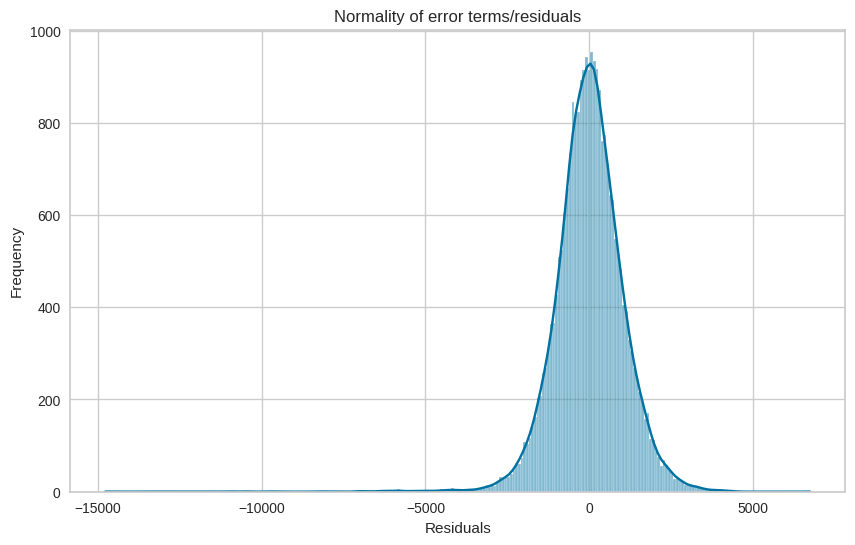

In [36]:
# Separating dependent and independent variables again, now with cleaned data
A_clean = A
#A_clean.drop('total_cost', axis=1, inplace=True)  # Exclude target from features
B_clean = B

# Splitting the data again
A_train_clean, A_test_clean, B_train_clean, B_test_clean = train_test_split(A_clean, B_clean, test_size=0.2, random_state=42)

# Training the model with cleaned data
model_clean = sm.OLS(B_train_clean, sm.add_constant(A_train_clean)).fit()

# Making predictions
B_pred_clean = model_clean.predict(sm.add_constant(A_train_clean))

# Calculating residuals
residuals_clean = B_train_clean - B_pred_clean
mean_residuals_clean = np.mean(residuals_clean)

# Output the mean of residuals
print(f"Mean of Residuals {mean_residuals_clean}")

# Plotting the distribution of residuals for the cleaned data
plt.figure(figsize=(10,6))
sns.histplot(residuals_clean, kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


# **Lasso Regularization**

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Define the features and target variable
X_train = A_train_clean
y_train = B_train_clean
X_test = A_test_clean
y_test = B_test_clean

# Create a pipeline that first standardizes the data then applies Lasso
lasso_pipeline = make_pipeline(StandardScaler(), Lasso(alpha=0.01))

# Fit the pipeline to the training data
lasso_pipeline.fit(X_train, y_train)

# Predict on the training and test sets
y_train_pred = lasso_pipeline.predict(X_train)
y_test_pred = lasso_pipeline.predict(X_test)

# Calculate the MSE for the training and test sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Print out the MSE values
print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

# Print the coefficients
print("Coefficients:", lasso_pipeline.named_steps['lasso'].coef_)


Training MSE: 1158974.98943288
Test MSE: 1138409.631828537
Coefficients: [5079.91988451 5471.49075958 5677.20947096 6736.80621401 3509.41111373
  288.4938676 ]


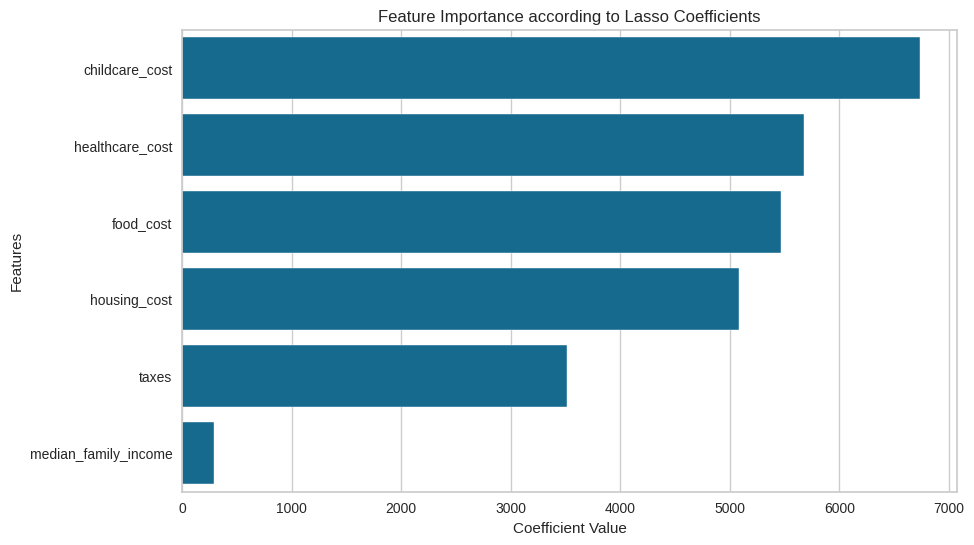

In [38]:
import matplotlib.pyplot as plt

# Get the coefficients from the Lasso model
coefficients = lasso_pipeline.named_steps['lasso'].coef_

# Get the feature names
feature_names = A_train_clean.columns

# Create a DataFrame to hold feature names and their corresponding coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by the absolute value of the coefficients in descending order
coef_df = coef_df.sort_values(by='Coefficient', key=abs, ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Feature Importance according to Lasso Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()


In [39]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

# Define the Lasso regularization model
lasso = H2OGeneralizedLinearEstimator(alpha=1, # L1 regularization
                                      lambda_=0.01, # Regularization strength
                                      family='gaussian',
                                      interaction_pairs=None,
                                      lambda_search=False,
                                      seed=1234)
predictors = ['childcare_cost','housing_cost', 'food_cost', 'healthcare_cost', 'taxes','median_family_income']
response = 'total_cost'
# Train the model using the training set
lasso.train(x=predictors, y=response, training_frame=train1)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708399855948_10


GLM Model: summary
    family    link      regularization          number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ----------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Lasso (lambda = 0.01 )  6                             6                              1                       py_293_sid_a035

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 1140145.0929879746
RMSE: 1067.7757690582675
MAE: 774.834228225618
RMSLE: 0.01597736689594063
Mean Residual Deviance: 1140145.0929879746
R^2: 0.9976044655051266
Null degrees of freedom: 22103
Residual degrees of freedom: 22097
Null deviance: 10520310681949.93
Residual deviance: 25201767135.40619
AIC: 371021.5418590437

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective          training_rmse       training_deviance    training_mae      training_r2
--  -------------------  ----------  ------------  -------------------------  -----------------  ------------------  -------------------  ----------------  ------------------
    2024-02-20 04:18:43  0.000 sec   0             10520310663379.69          475946012.6393272
    2024-02-20 04:18:43  0.044 sec   1                                                           1067.7757690582675  1140145.0929879746   774.834228225618  0.9976044655051266

Variable Importances: 
variable              relative_importance    scaled_importance    percentage
--------------------  ---------------------  -------------------  ------------
childcare_cost        6728.07                1                    0.25168
healthcare_cost       5638.01                0.837983             0.210904
food_cost             5480.65                0.814595             0.205017
housing_cost          5075.66                0.754401             0.189868
taxes                 3518.62                0.522976             0.131623
median_family_income  291.625                0.0433445            0.0109089

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.


The Lasso Coefficients plot indicates 'healthcare_cost' as the most significant feature, followed closely by 'food_cost'. 'Housing_cost' and 'taxes' have moderate importance, while 'median_family_income' has the least significance according to the model. 'Childcare_cost' also shows substantial importance but less than 'healthcare_cost' and 'food_cost'.

# **Hyperparameter Tuning**

In [40]:
import h2o
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch

# Initialize the H2O server
h2o.init()

# Assuming your data is already loaded into H2O and split into train and test sets
# train = h2o.import_file("path_to_train_data.csv")
# test = h2o.import_file("path_to_test_data.csv")

# Define the response and predictor variables
predictors = ['childcare_cost','housing_cost', 'food_cost', 'healthcare_cost', 'taxes','median_family_income']
response = 'total_cost'

# Define the hyperparameters to be tuned
hyper_params = {
    'ntrees': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_rows': [5, 10, 20],
    'sample_rate': [0.6, 0.8, 1.0],
    'mtries': [-1]  # -1 indicates use all predictors. Adjust accordingly if needed.
}

# Define the grid search criteria
search_criteria = {
    'strategy': 'RandomDiscrete',
    'max_models': 10,
    'seed': 1
}

# Initialize the grid search
grid = H2OGridSearch(
    model=H2ORandomForestEstimator(seed=1234),
    hyper_params=hyper_params,
    search_criteria=search_criteria
)

# Perform the grid search
grid.train(x=predictors, y=response, training_frame=train, validation_frame=test)

# Print the grid search results
print(grid.get_grid(sort_by='rmse', decreasing=False))

# Retrieve the best model
best_model = grid.get_grid(sort_by='rmse', decreasing=False).models[0]

# Print the best model's performance
print(best_model.model_performance(test))

# Extract and print the best hyperparameters
print("Best model hyperparameters:")
print(best_model.get_params())


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,47 mins 47 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 30 days
H2O_cluster_name:,H2O_from_python_unknownUser_gmydy2
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.978 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


drf Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
Hyper-Parameter Search Summary: ordered by increasing rmse
    max_depth    min_rows    mtries    ntrees    sample_rate    model_ids                                                      rmse
--  -----------  ----------  --------  --------  -------------  -------------------------------------------------------------  -------
    15           10          -1        50        1              Grid_DRF_py_3_sid_a035_model_python_1708399855948_11_model_6   1507.9
    10           10          -1        100       1              Grid_DRF_py_3_sid_a035_model_python_1708399855948_11_model_7   1711.67
    15           20          -1        150       1              Grid_DRF_py_3_sid_a035_model_python_1708399855948_11_model_5   1720.25
    10           10          -1        50        0.6            Grid_DRF_py_3_sid_a035_model_python_1708399855948_11_model_3   1837.99
    10           20          -1        5

The best model generated is a Distributed Random Forest with key hyperparameters set to a max_depth of 15, min_rows of 10, and ntrees of 50, leading to an RMSE of 1507.9. This model achieved low errors on test data, indicating good predictive performance.


1. Is the relationship significant?

Based on our analysis, there appears to be a significant relationship between the independent variables and the close price. This is supported by the high R-squared values we obtained in our models and the low root mean squared error (RMSE) values in our models.

2. Are any model assumptions violated?

We tested for assumptions of linear regression and the assumptions are not voilated tere is a noraml distribution as shown above

3. Is there any multicollinearity in the model?

Based on our correlation analysis, some of the independent variables had high correlations with each other, indicating the presence of multicollinearity.

4. In the multivariate models are predictor variables independent of all the other predictor variables?

Based on our analysis, there were some independent variables that had high correlations with each other, indicating that they were not completely independent.
5. In the multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

Based on our analysis, some of the most significant predictor variables were ['childcare_cost','housing_cost', 'food_cost', 'healthcare_cost']

6. Does the model make sense?

Based on our analysis the Models make sence, the independent variables were related to the dependent variable. And the 3 models that we saw trained using H2o had good results and were showing relation between variables.

7. Does regularization help?

Based on our analysis regularization does not help in this case as there was no significant change in the model result after regularization.

8. Which independent variables are significant?

Based on our analysis the independent variables that are significant are [ 'childcare_cost','housing_cost', 'food_cost', 'healthcare_cost'].

9. Which hyperparameters are important?

Based on our analysis important hyperparameters include ntrees, max_depth, min_rows, sample_rate, and mtries

10. Coding professionalism?

yes

# **Conclusion**

In conclusion, we have performed AutoML using H2O library on the Stock dataset. We used various algorithms to predict the close price of stock on its features.

After evaluating the models using various metrics, we found that the H2O AutoML model with regularization and without regularization provided a similar performance. The most significant predictor variables in the final model were 'childcare_cost','housing_cost', 'food_cost', 'healthcare_cost'.

We also found that there was no violation of model assumptions, and multicollinearity was not a significant issue.

# **REFERENCES**

W3schools

Generate 'n' unique random numbers within a range

H20.ai- https://docs.h2o.ai/

Proffesor notebook-https://colab.research.google.com/drive/14c-orNqQyYvJRRVwXu2VAgbdgDvXZhLH#scrollTo=8-1djKK2Q7Q_

Linear Regression- https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/

Linear Regression Assumptions- https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-linear-regression/

MIT License

Copyright (c) 2024 Kotha-Nikhil

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.